In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

# Define the path to your mounted Google Drive
drive_path = '/content/drive/MyDrive/WattTime'

# List all contents in the mounted drive
path_contents = os.listdir(drive_path)

# Print the contents
print(path_contents)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['co2_moer-SPP_KC-2023-v20230301.csv']


In [ ]:
import pandas as pd

# Creating a dataframe from the 'data_transaction_log.csv' file
df = pd.read_csv(drive_path + '/co2_moer-SPP_KC-2023-v20230301.csv')
print(f'Data type of the dataframe are: \n{df.dtypes}\n----')
df

Data type of the dataframe are: 
point_time         object
moer_lb_per_mwh     int64
dtype: object
----


point_time  moer_lb_per_mwh
0       2023-01-01 06:00:00+00:00             1485
1       2023-01-01 06:05:00+00:00             1509
2       2023-01-01 06:10:00+00:00             1486
3       2023-01-01 06:15:00+00:00             1468
4       2023-01-01 06:20:00+00:00             1460
...                           ...              ...
105127  2024-01-01 05:40:00+00:00             1434
105128  2024-01-01 05:45:00+00:00             1430
105129  2024-01-01 05:50:00+00:00             1388
105130  2024-01-01 05:55:00+00:00             1427
105131  2024-01-01 06:00:00+00:00             1390

[105132 rows x 2 columns]

# Transforming the time column to index and accounting for Time Zone and Daylight Savings change when compared with UTC:

 Kansas City lies in the Central Time Zone (CT) of the United States. The Central Time Zone is denoted as UTC-06:00 during Standard Time (CST) and UTC-05:00 during Daylight Saving Time (CDT).

* Time Zone Details:
  * Central Standard Time (CST): UTC-06:00
  * Central Daylight Time (CDT): UTC-05:00


Central TimeZone addresses the changes due to Daylight Savings.


In [ ]:
# Convert 'point_time' to datetime
df['point_time'] = pd.to_datetime(df['point_time'])

# Set 'point_time' as the DataFrame index
df.set_index('point_time', inplace=True)

# Transforming the time Zone from UTC TO Central Time Zone
# Ensure the datetime index is in UTC
df.index = df.index.tz_convert('UTC')

# Convert the datetime index from UTC to Central Time (America/Chicago)
df.index = df.index.tz_convert('America/Chicago')

df

moer_lb_per_mwh
point_time                                
2023-01-01 00:00:00-06:00             1485
2023-01-01 00:05:00-06:00             1509
2023-01-01 00:10:00-06:00             1486
2023-01-01 00:15:00-06:00             1468
2023-01-01 00:20:00-06:00             1460
...                                    ...
2023-12-31 23:40:00-06:00             1434
2023-12-31 23:45:00-06:00             1430
2023-12-31 23:50:00-06:00             1388
2023-12-31 23:55:00-06:00             1427
2024-01-01 00:00:00-06:00             1390

[105132 rows x 1 columns]

# Determining Information about the Data Quality and Summary Statistics



In [ ]:
# Display detailed information about the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105132 entries, 2023-01-01 00:00:00-06:00 to 2024-01-01 00:00:00-06:00
Data columns (total 1 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   moer_lb_per_mwh  105132 non-null  int64
dtypes: int64(1)
memory usage: 1.6 MB
None


Note: There are no null values. There is no need for interpolation/filling up any gaps in the time-series data.

In [ ]:
# Determining summary statistics of the marginal emissions
df.describe()

moer_lb_per_mwh
count    105132.000000
mean       1243.190770
std         444.949551
min           9.000000
25%        1360.000000
50%        1396.000000
75%        1433.000000
max        1544.000000

Observations:
1. There is considerable spread in the distribution. 75% of the data points lie between 1350 and 1550 lb_CO2/MWh
2. The distribution is highly skewed

# Understanding the Data via Exploratory Data Analysis
1. Histogram of MOER values across the year
  * Zoomed in histograms of the two modes
2. Daily time series data for 5 randomly sampled days
3. Weekly time series data for 5 randomly sampled weeks

1. Histogram of MOER values across the year

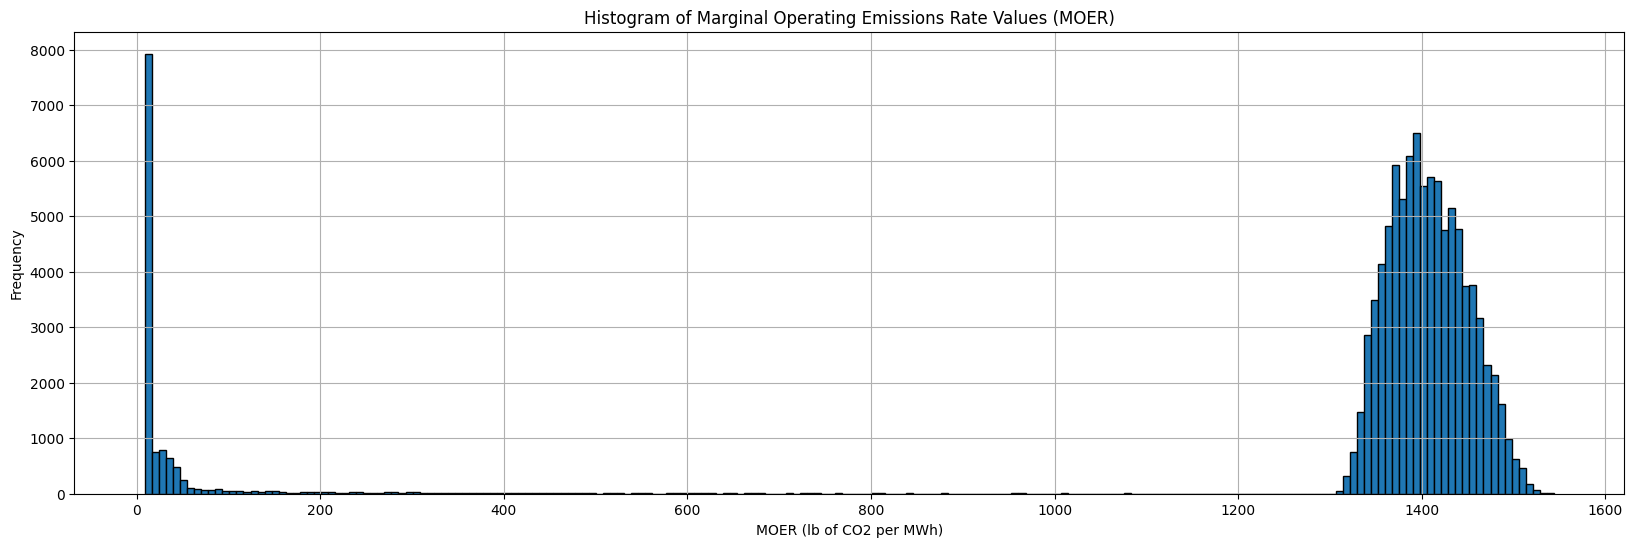

In [ ]:
# Plotting the marginal operating emissions rate values to observe the distribution and its mode(s)
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

def plot_histogram(df, column, bins=500, x_min=None, x_max=None, figsize=(20, 6)):
    """
    Plots a histogram for the moer values.

    Parameters:
    - df: pandas DataFrame
    - column: str, name of the column to plot
    - bins: int, number of bins for the histogram (default is 500)
    - x_min: float or int, minimum x-axis limit (default is None)
    - x_max: float or int, maximum x-axis limit (default is None)
    - figsize: tuple, figure size (default is (20, 6))
    """
    plt.figure(figsize=figsize)
    plt.hist(df[column], bins=bins, edgecolor='black')
    plt.title(f'Histogram of Marginal Operating Emissions Rate Values (MOER)')
    plt.xlabel('MOER (lb of CO2 per MWh)')
    plt.ylabel('Frequency')
    plt.grid(True)

    # Set the x-axis limits if specified
    if x_min is not None and x_max is not None:
        plt.xlim(x_min, x_max)

    plt.show()

# Histogram of MOER Values (Distribution)
plot_histogram(df, 'moer_lb_per_mwh', bins=200, x_min=None, x_max=None)


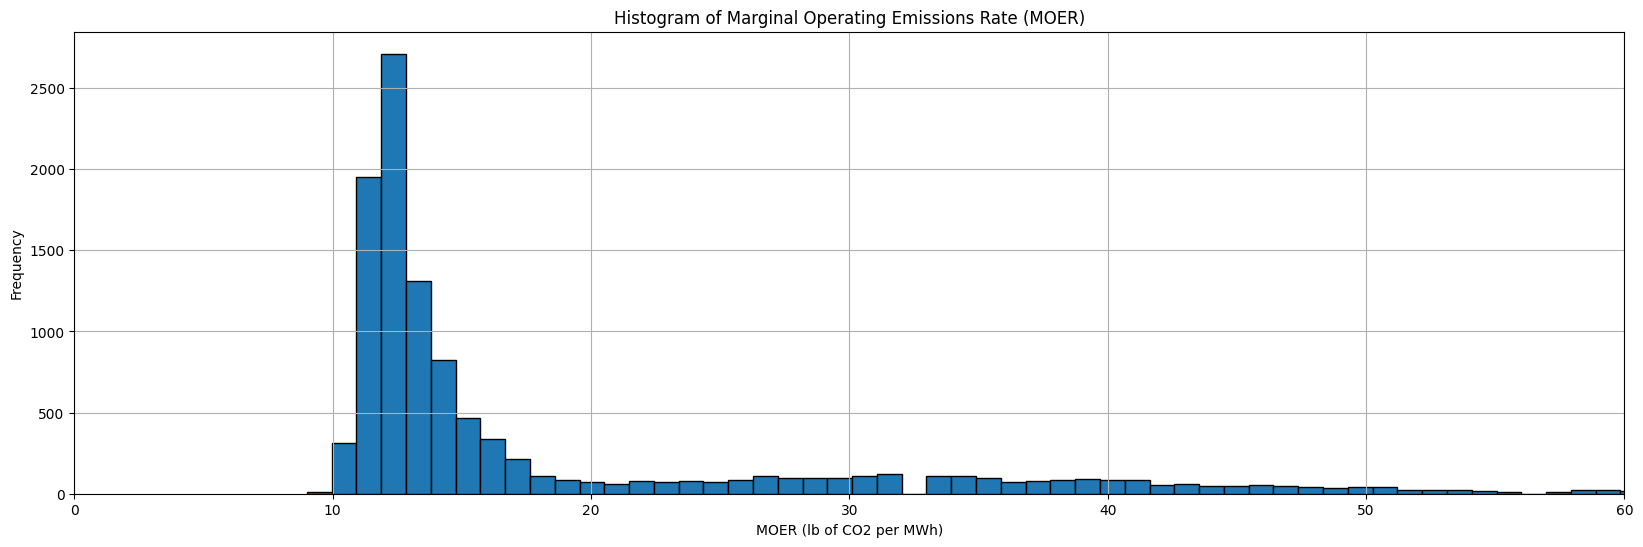

In [ ]:
import random

def plot_sub_histogram(df, column, bins=500, x_min=None, x_max=None, figsize=(20, 6)):
    plt.figure(figsize=figsize)
    plt.hist(df[column], bins=bins, edgecolor='black')
    plt.title(f'Histogram of Marginal Operating Emissions Rate (MOER)')
    plt.xlabel('MOER (lb of CO2 per MWh)')
    plt.ylabel('Frequency')
    plt.grid(True)

    # Set the x-axis limits if specified
    if x_min is not None and x_max is not None:
        plt.xlim(x_min, x_max)

    plt.show()


# Observing the first mode of the distribution
plot_sub_histogram(df, 'moer_lb_per_mwh', bins=1600, x_min=0, x_max=60)


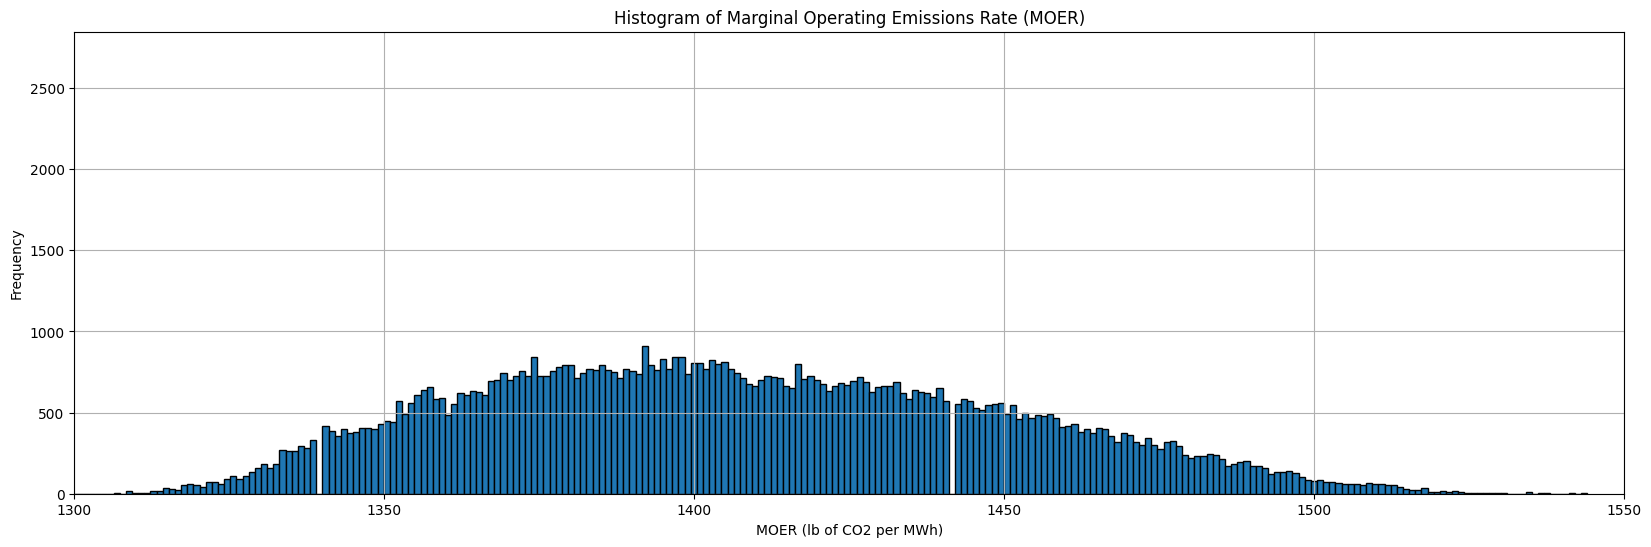

In [ ]:
# Observing the second mode of the distribution
plot_sub_histogram(df, 'moer_lb_per_mwh', bins=1550, x_min=1300, x_max=1550)


In [ ]:
# Writing a function to plot time series data

def plot_time_series(df, day_long=False, week_long=False, mark_lowest_n=False, mark_baseline_charging=False):
    """
    This function takes a DataFrame with 'point_time' as the index and
    'moer_lb_per_mwh' as a column, and plots a time series graph.

    Parameters:
    df (pd.DataFrame): The input DataFrame with 'point_time' as the index and 'moer_lb_per_mwh' as a column.
    """
    # Check if 'point_time' is in the index
    if df.index.name != 'point_time':
        raise ValueError("The DataFrame's index must be 'point_time'.")

    # Check if 'moer_lb_per_mwh' column exists
    if 'moer_lb_per_mwh' not in df.columns:
        raise ValueError("The DataFrame must contain a 'moer_lb_per_mwh' column.")

    # Plot the time series
    plt.figure(figsize=(20, 6))
    plt.plot(df.index, df['moer_lb_per_mwh'], marker='o', linestyle='-', label='MOER values')
    if day_long:
      plt.title('CO2 Marginal Emissions Rate (lb of CO2/MWh) for the Date: '+ str(df.index[0].date()), fontsize=20)
    elif week_long:
      plt.title('CO2 Marginal Emissions Rate (lb of CO2/MWh) for the Week Starting: '+ str(df.index[0].date()), fontsize=20)
    else:
      plt.title('CO2 Marginal Emissions Rate (lb of CO2/MWh)',fontsize=20 )

    if mark_lowest_n and 'lowest_n' in df.columns:
      plt.scatter(df.index[df['lowest_n']],
              df['moer_lb_per_mwh'][df['lowest_n']],
              color='green',
              marker='D',
              s=150,  # Size of the marker
              zorder=10,  # Higher zorder brings the marker to the front
              alpha=0.5,  # Transparency of the marker
              label='Lowest lb_per_mwh values')
      # Highlight the time bands corresponding to 'lowest_n' with transparency
      for i in range(len(df) - 1):
          if df['lowest_n'].iloc[i]:
              start_time = df.index[i]
              end_time = df.index[i+1]
              plt.axvspan(start_time, end_time, color='green', alpha=0.3)

    if mark_baseline_charging and 'baseline_charging' in df.columns:
      plt.scatter(df.index[df['baseline_charging']],
              df['moer_lb_per_mwh'][df['baseline_charging']],
              color='red',
              marker='D',
              s=150,  # Size of the marker
              zorder=10,  # Higher zorder brings the marker to the front
              alpha=0.5,  # Transparency of the marker
              label='MOER values during baseline charging')
      # Highlight the time bands corresponding to 'lowest_n' with transparency
      for i in range(len(df) - 1):
          if df['baseline_charging'].iloc[i]:
              start_time = df.index[i]
              end_time = df.index[i+1]
              plt.axvspan(start_time, end_time, color='red', alpha=0.3)

    plt.xlabel('Time', fontsize=18)
    plt.ylabel('Emissions Intensity (lb of CO2/MWh)', fontsize=18)
    # Add the legend
    plt.legend(loc='best', fontsize=14)
    plt.grid(True)
    plt.yticks(fontsize=14)
    plt.xticks(rotation=45, fontsize=14)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()


# Extracting the daily dataframes and observing 5 days via sampling

In [ ]:
# Extracting smaller dataframes for each day
# Group by each day
df_copy = df.copy()
grouped = df_copy.groupby(pd.Grouper(freq='D'))

# Extract each group into a separate DataFrame and store in a list
daily_dataframes = [group for _, group in grouped]

# Optionally, you can also store them in a dictionary with the date as the key
daily_dataframes_dict = {date: group for date, group in grouped}

2. Visualizing Daily time series data for 5 randomly sampled days

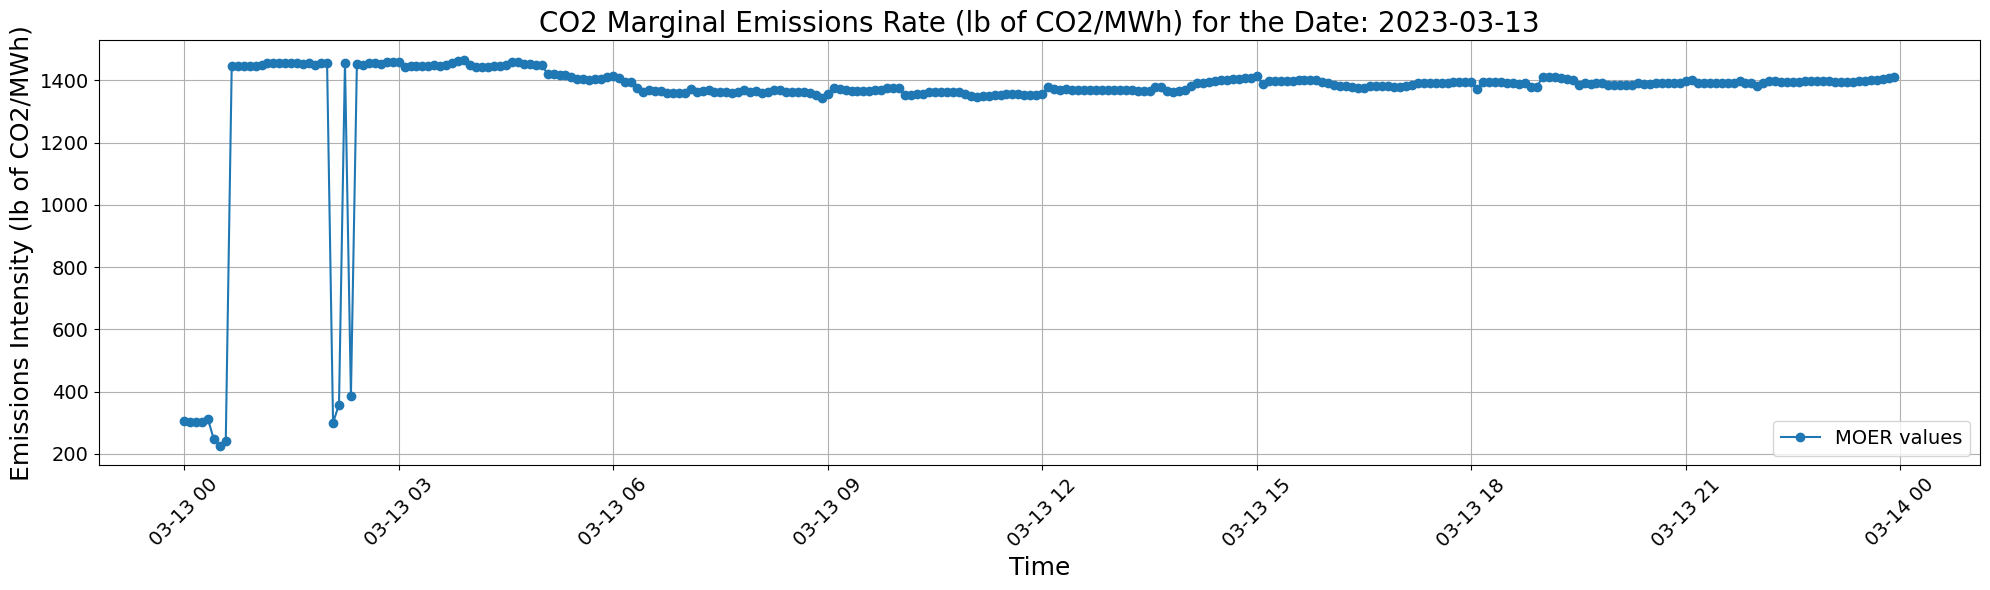

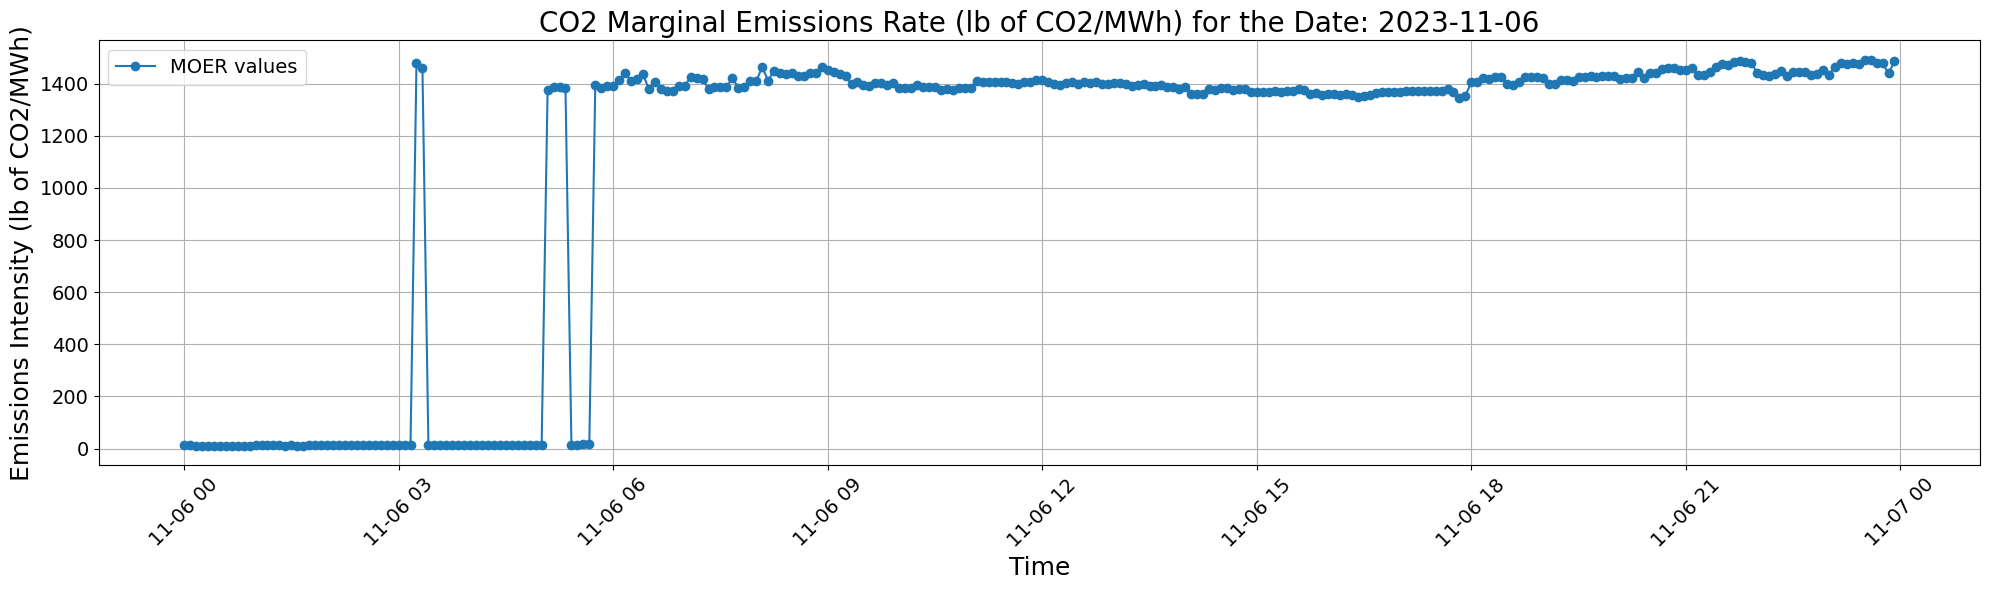

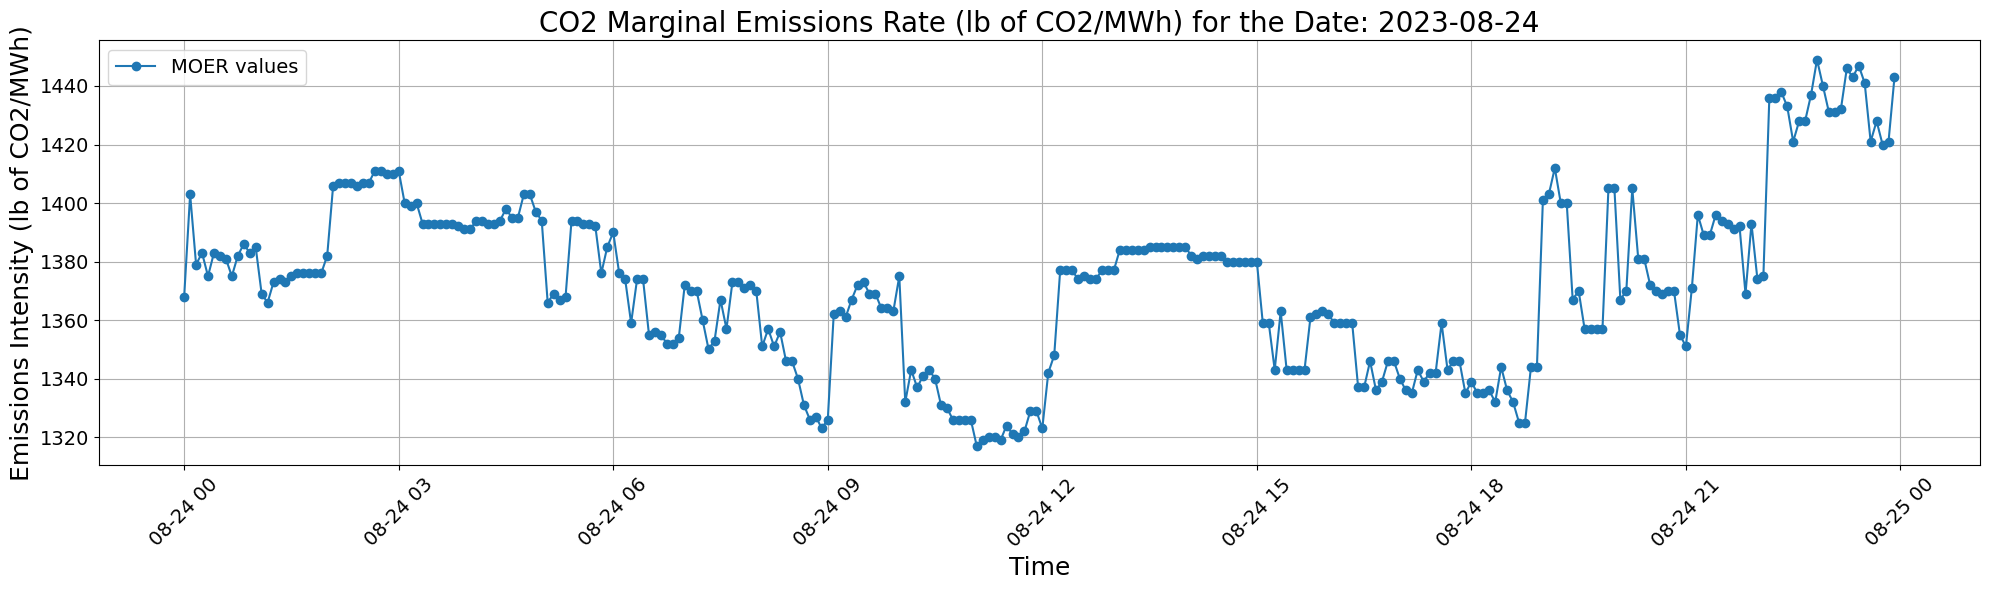

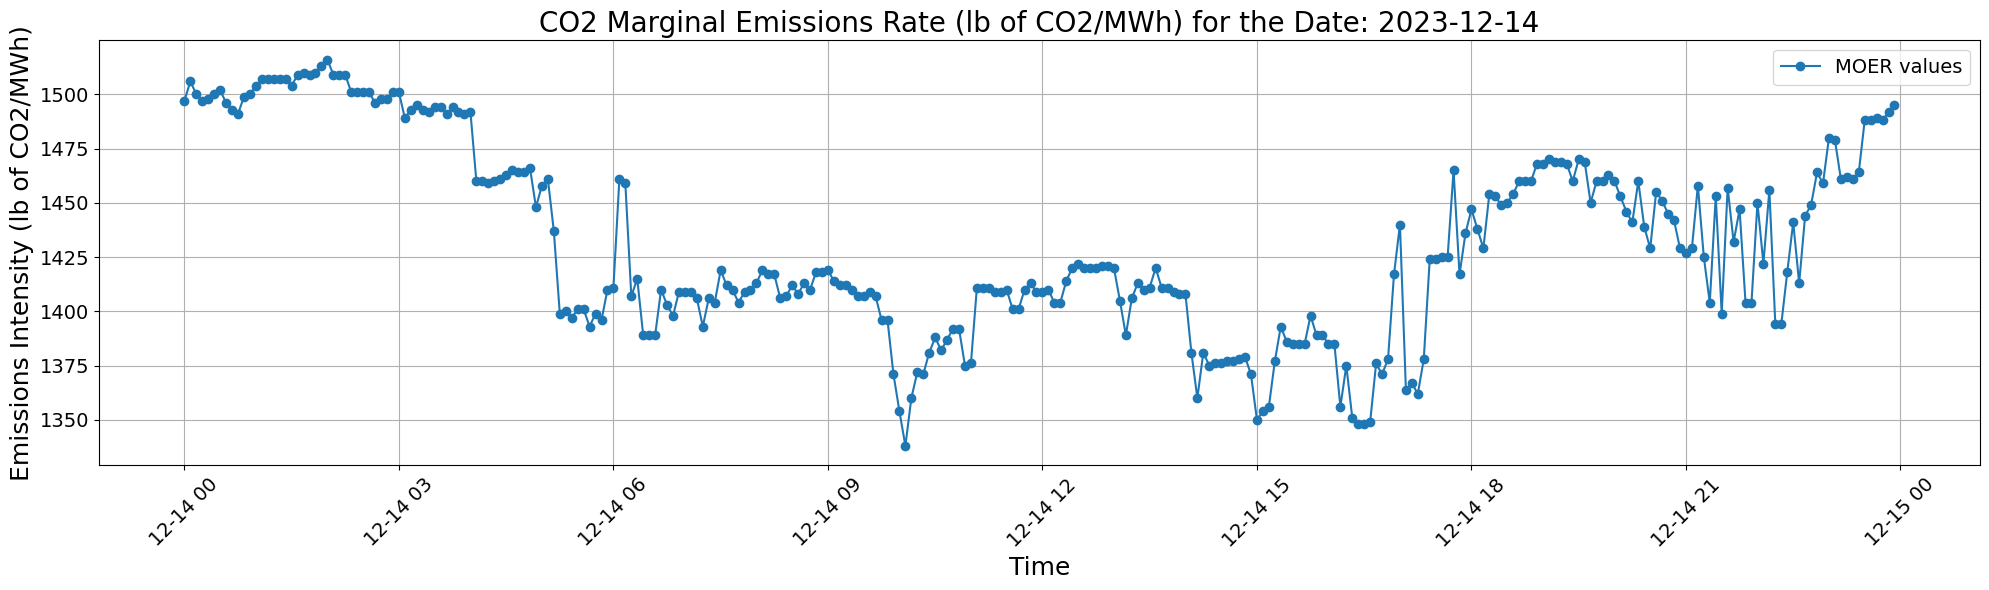

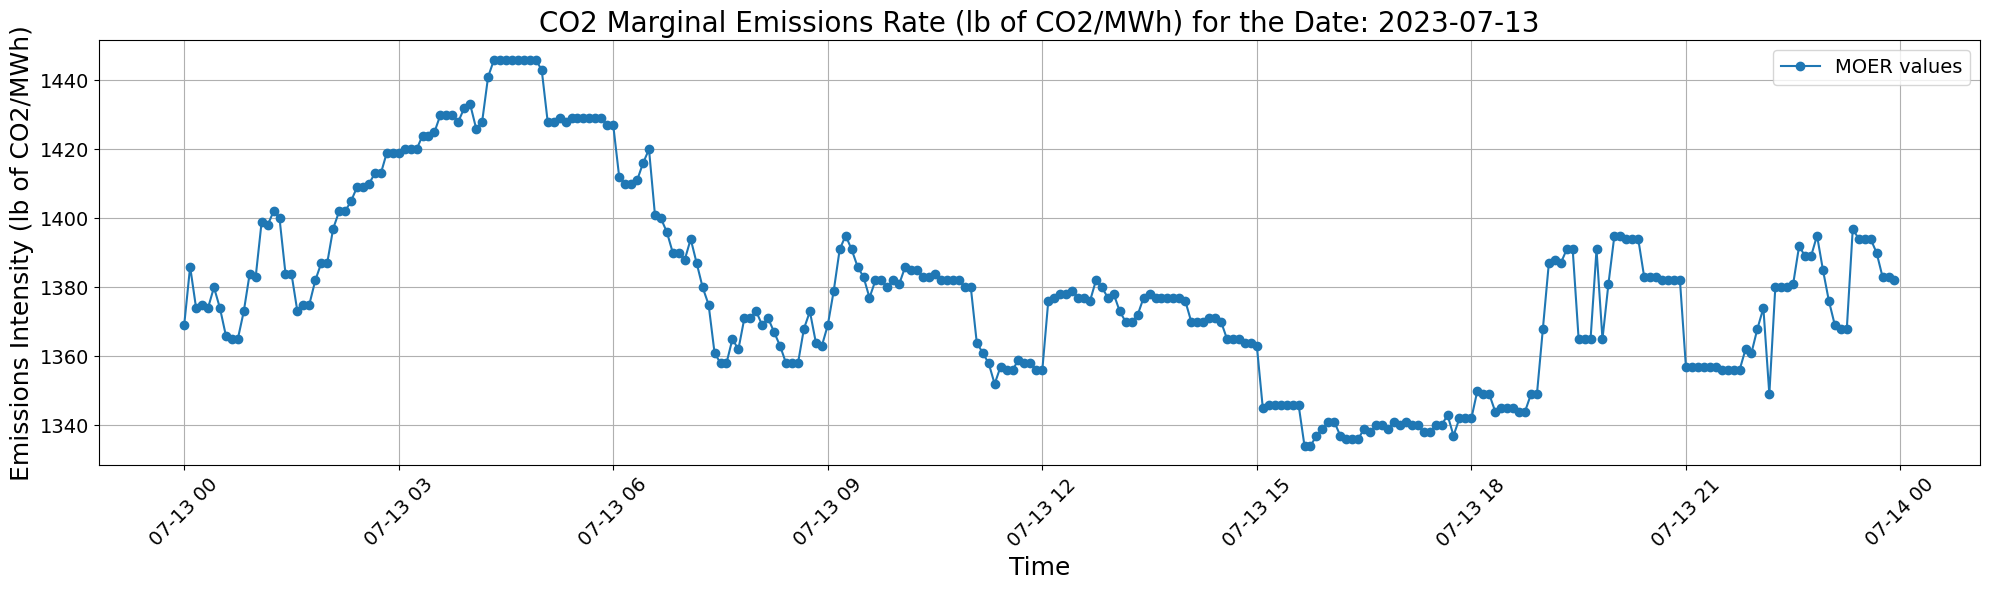

In [ ]:
# Plotting 5 days randomly from daily_dataframes array
random_day_dataframes = random.sample(daily_dataframes, 5)

# Print the separate DataFrames (from midnight to midnight)
for day_df in random_day_dataframes:
    plot_time_series(df=day_df, day_long=True)

# Extrating week long dataframes from the larger dataframe

In [ ]:
df_copy = df.copy()
grouped = df_copy.groupby(pd.Grouper(freq='W'))

# Extract each group into a separate DataFrame and store in a list
weekly_dataframes = [group for _, group in grouped]

# Optionally, you can also store them in a dictionary with the week start date as the key
weekly_dataframes_dict = {date: group for date, group in grouped}

# Example of printing the start date of each week and the corresponding DataFrame
# for date, group in weekly_dataframes_dict.items():
#     print(f"Week starting on {date}:\n", group.head(), "\n")

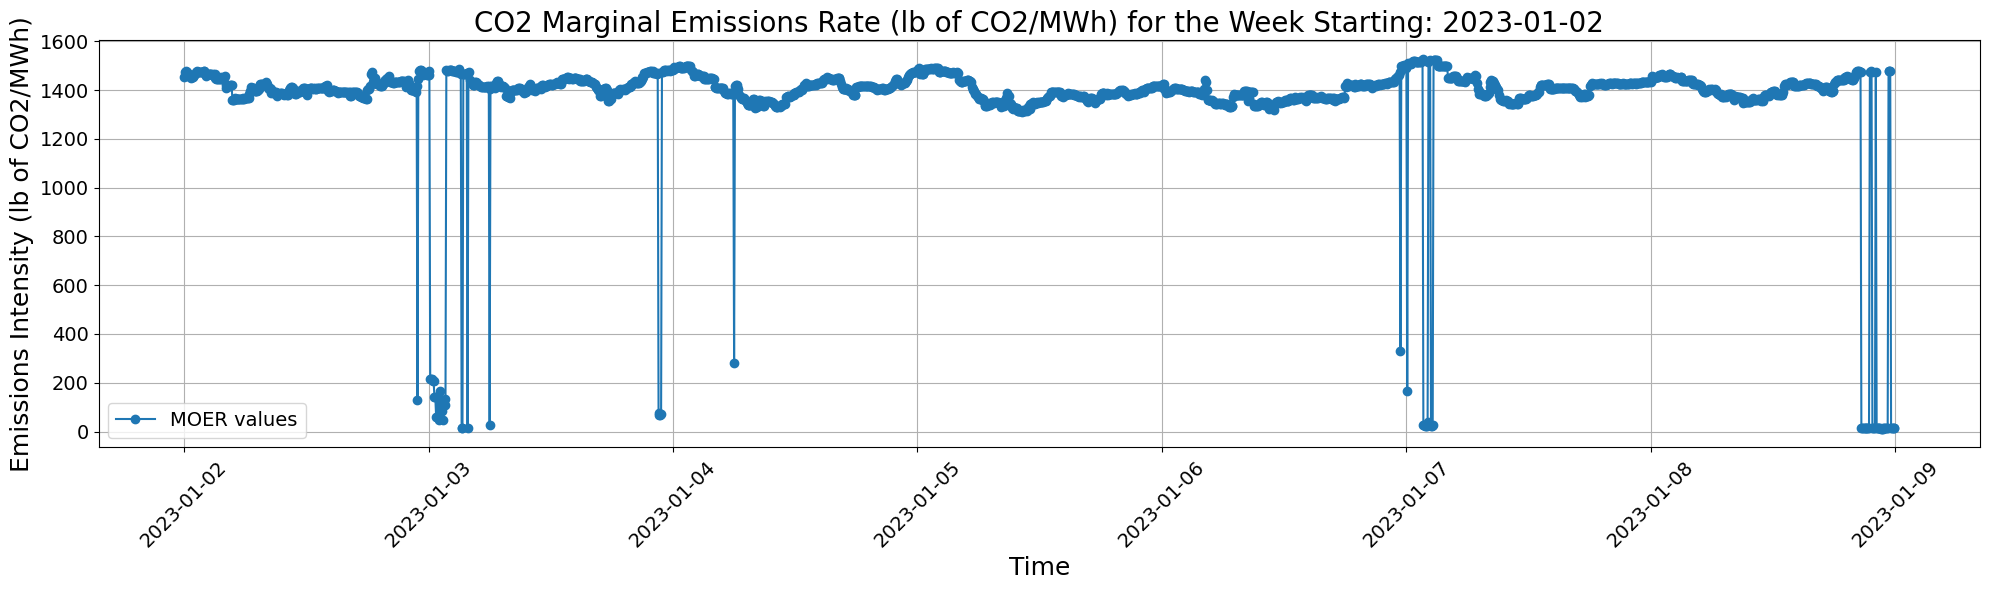

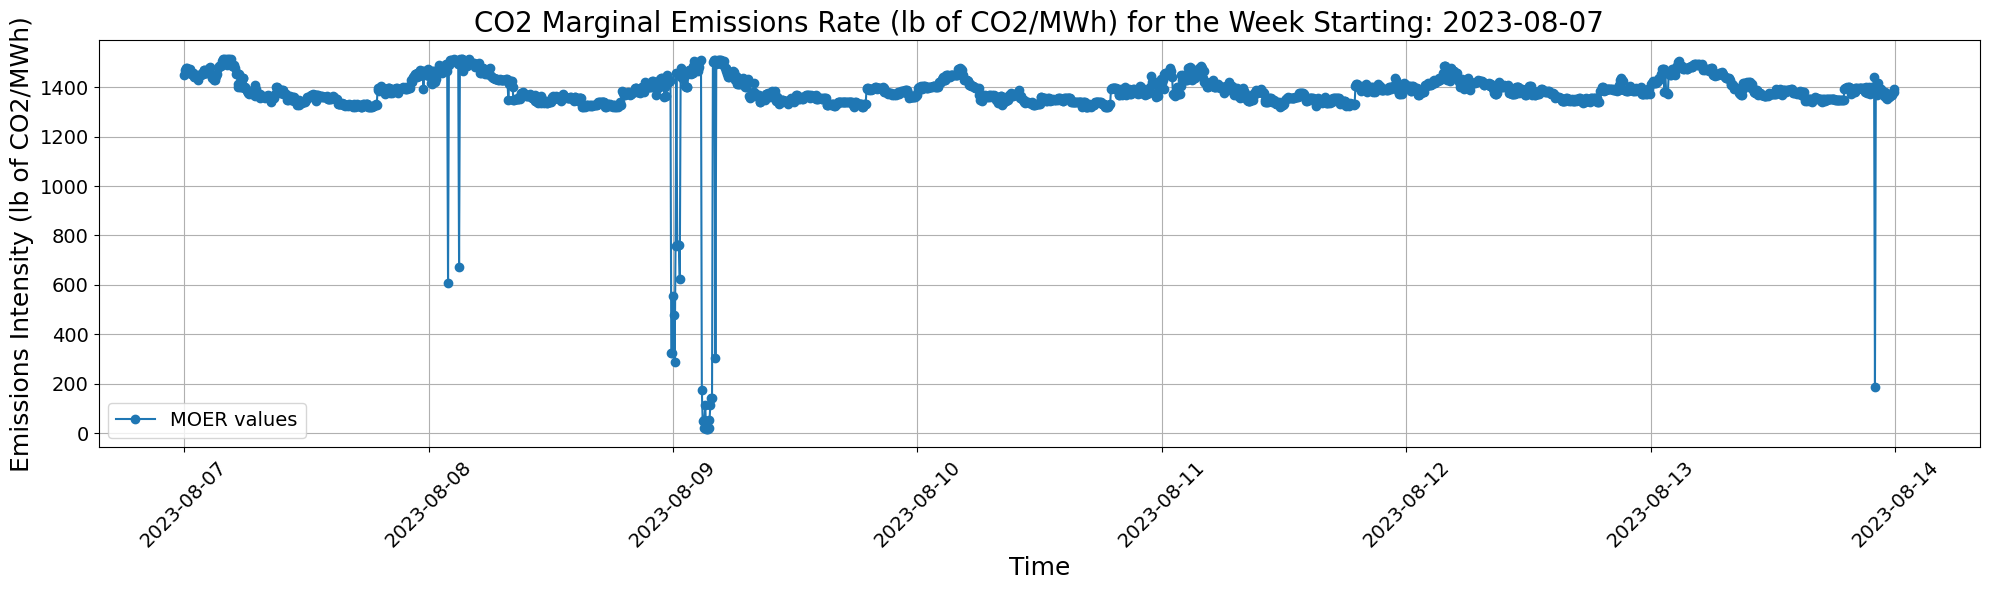

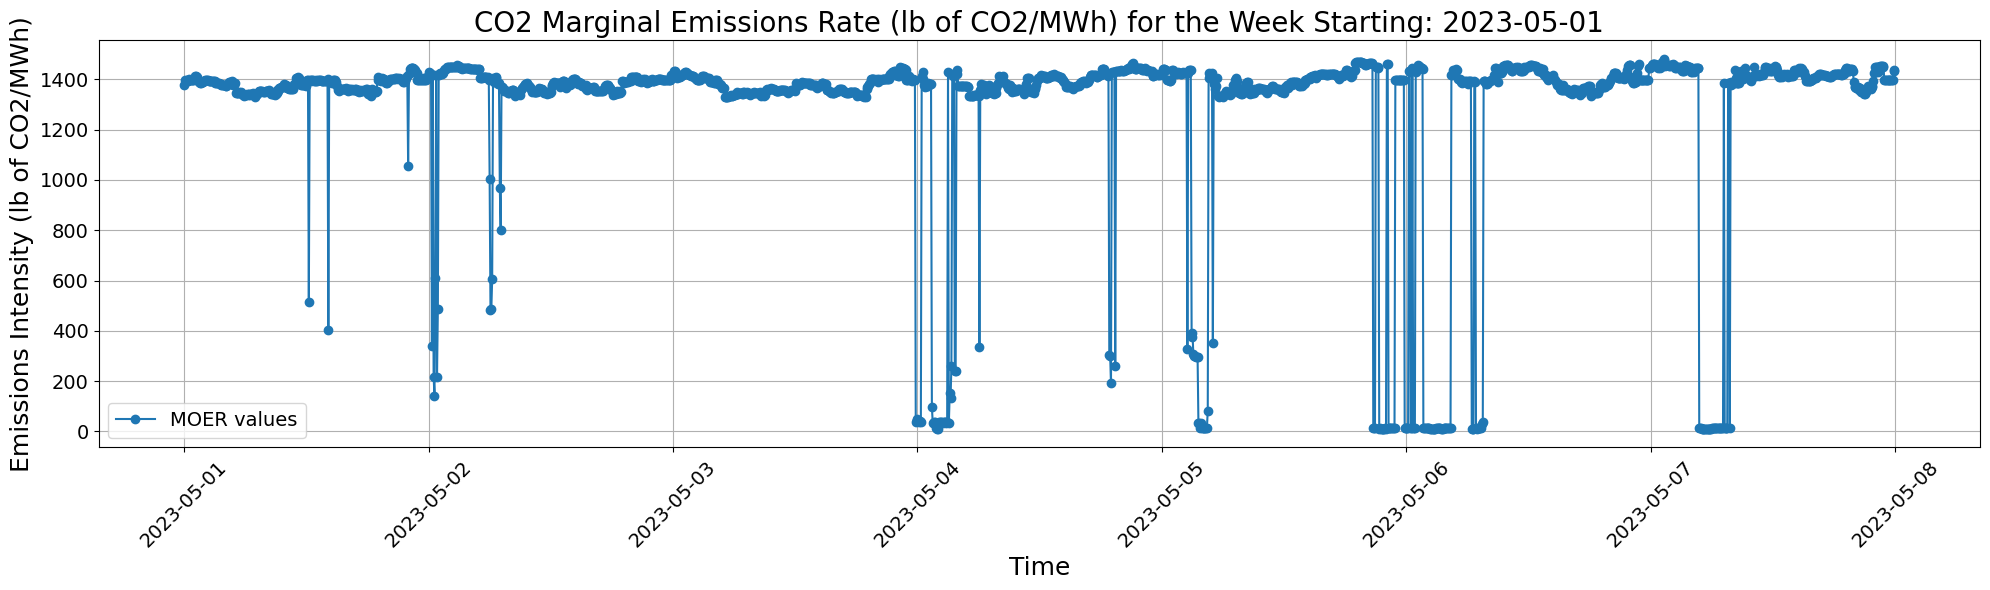

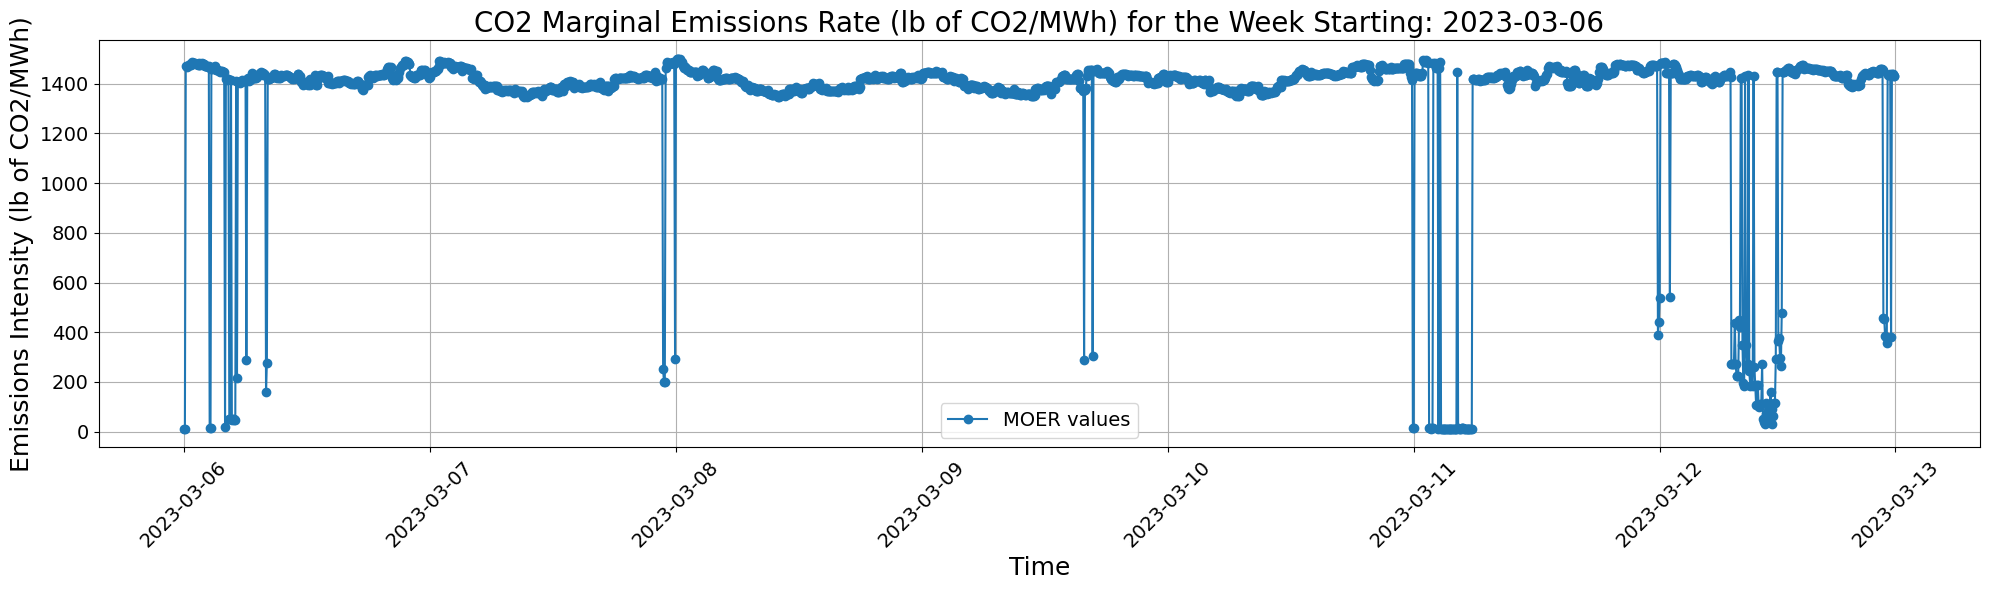

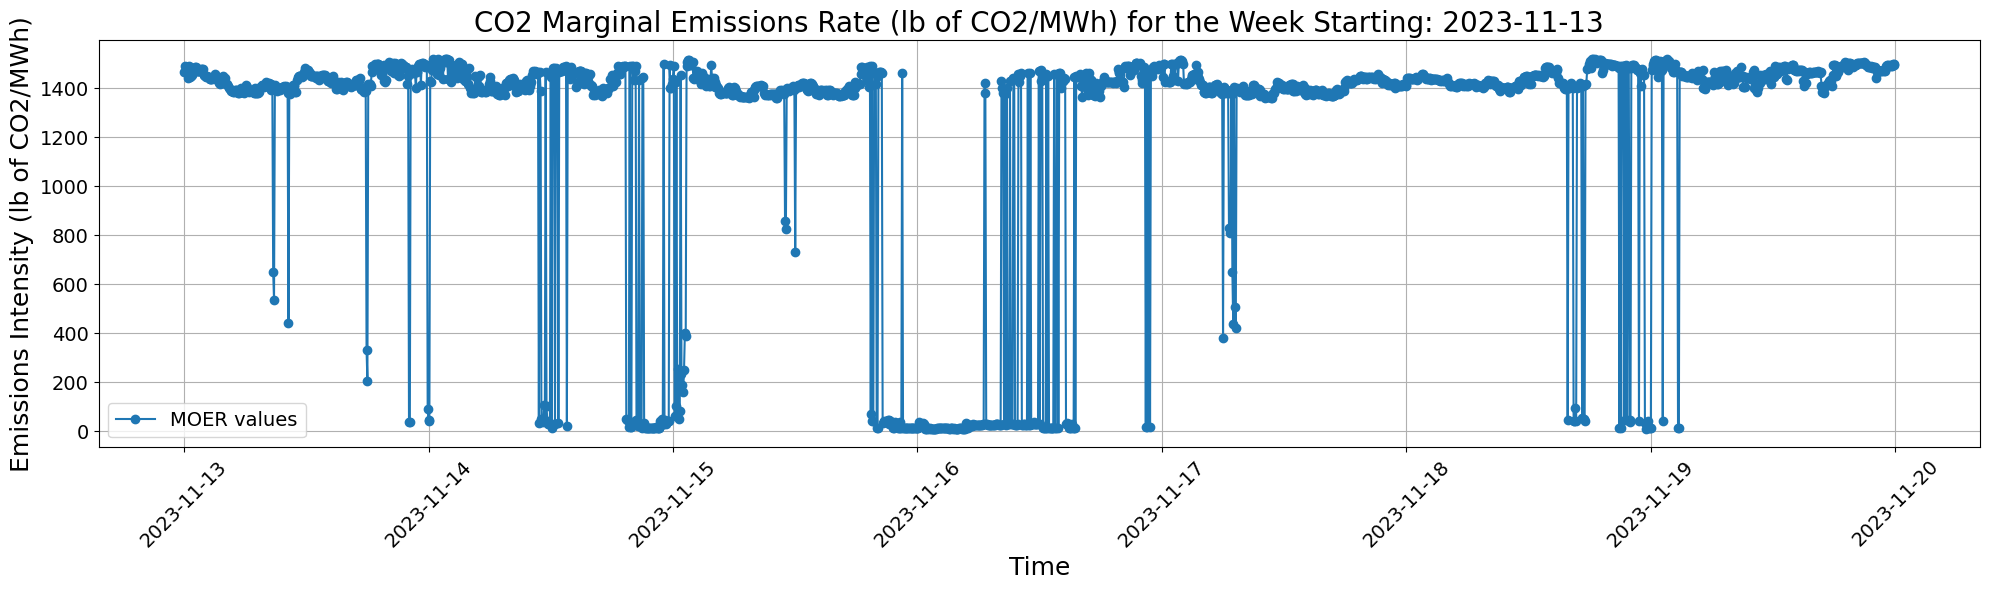

In [ ]:
# Plotting 3 weeks randomly from weekly_dataframes array
random_week_dataframes = random.sample(weekly_dataframes, 5)

# Print the separate DataFrames (from midnight to midnight)
for week_df in random_week_dataframes:
    plot_time_series(df=week_df, week_long=True)

# Key Assumptions for an Electric Vehicle Owner in Kansas:

1. Driving/Busy hours during the week
  * 8 am to 6 pm for work-related commute and another 4 hrs considered for other activities

2. Charging hours availability at home (Opportunity Window)
  * Plug-in for 9 hrs everyday from 9 pm to 6 am. Foavorable from two points of view:
    * Accommodating driving activity other than commuting to and from work
    * Lies outside of peak hours

3. Power Pricing in Kansas:
  * Peak Hours between 4 pm to 8 pm
  * Lower charges from 12 am to 6 am


4. Charger type at Home (Assumptions based on US avg)
  * Range of Power provided by chargers: 1kWatt to 22kWatt
  * Level 1: Wall Connector  (Low Power) ~ 1-2 kWatt
  * Level 2: Mobile Connector (High Power) ~ 7-22 kWatt
  * Average Power consumed by a home charger: 7 kWatt

5. Miles generated per unit charged for an average BEV (US avg)
  * 1 kWH generates 2.5-4 miles range: 3 miles/kWh (Median value)

6. Typical Kansas Driver Profile
  * Annual Miles Driven:  14781 miles
  
7. Charging Behaviour:
  * Number of days/week the BEV is plugged at Home: 6
  * % charging at Home: 80% annually
  * Annual miles sourced from Home Charging: 11800
  * Daily average miles to be charged at home: 38.1 miles

6. Charging Requirements:
  * BEV Range: 250 miles
  * Suppose at Day Start, the vehicle charge is 80% (250 miles *0.8) = 200 miles
  * End of the day, 38.1 miles consumed = 161.9 miles (65% of the range)
  * Hours of charging needed @ 7 kWatt to add 38.1 miles:

$$
Time (hours) = (\frac{\text{Distance (miles)}}{\text{Miles_added_per_kWh} \times \text{Power Rating of Charger (kWatt)}})
$$
  * Time (hours) =  1.8126 hours (1 hr 50 min)


Therefore, each day we need to find 1hr 50min of total charging time in the 9 hour interval such that our emissions are minimized.


In [ ]:
# Writing a function to claculate the total hours for which we need to charge our vehicle depending on the different inputs

def calculate_time(miles_added_per_kWh, power, annual_miles, days_of_charging):
    """
    Calculate the time required to cover a distance based on the power rating of the charger.

    Parameters:
        distance (float): The distance to be covered.
        miles_added_per_kWh (float): Efficiency in miles per kWh.
        power (float): Power input.

    Returns:
        float: Time in hours required to cover the distance.
    """
    # Calculate time based on the formula
    miles_needed_per_day = annual_miles / days_of_charging
    time_hours = miles_needed_per_day / (miles_added_per_kWh * power)
    return round(time_hours, 4)

# Example usage
annual_miles = 11800  # miles
days_of_charging = 310
miles_added_per_kWh = 3  # miles/kWh
charger_power_rating = 7  # kWh
time_required = calculate_time(miles_added_per_kWh, charger_power_rating, annual_miles, days_of_charging)
print("Daily charging time required:", time_required, "hours OR ", time_required*60, "minutes")

Daily charging time required: 1.8126 hours OR  108.756 minutes


# Performing Data Transformation
1. Extracting daily dataframes from noon to noon instead of midnight to midnight
  - Reason: Focus on the night time which is when we will be charging
2. Removing the first and the last dataframes from the daily_shifted_dataframes array as they only have information for half the night
3. Extract night intervals from the daily shifted dataframes
4. Adding additional column to the dataframe which marks the lowest n values
5. Adding additional column to the dataframe which marks the baseline Charging Time interval



# 1. Extracting dataframes from noon to noon


In [ ]:

# Create a custom grouping interval column
def custom_grouping_interval(dt_index):
    # Shift time by 12 hours, then floor to the nearest day, then shift back by 12 hours
    return (dt_index - pd.Timedelta(hours=12)).floor('D') + pd.Timedelta(hours=12)

df_copy = df.copy()
df_copy['grouping_interval'] = custom_grouping_interval(df_copy.index)

# Group by the custom grouping interval
grouped = df_copy.groupby('grouping_interval')

# Extract each group into a separate DataFrame and store in a list
daily_shifted_dataframes = [group.drop(columns=['grouping_interval']) for _, group in grouped]

# Optionally, you can also store them in a dictionary with the interval start time as the key
daily_shifted_dataframes_dict = {interval: group.drop(columns=['grouping_interval']) for interval, group in grouped}

# Print the separate DataFrames
# for interval, group in grouped:
#     print(f"Interval starting at {interval}")
#     print(group.drop(columns=['grouping_interval']))
#     print("\n")

In [ ]:
daily_shifted_dataframes[0]

moer_lb_per_mwh
point_time                                
2023-01-01 00:00:00-06:00             1485
2023-01-01 00:05:00-06:00             1509
2023-01-01 00:10:00-06:00             1486
2023-01-01 00:15:00-06:00             1468
2023-01-01 00:20:00-06:00             1460
...                                    ...
2023-01-01 11:35:00-06:00             1394
2023-01-01 11:40:00-06:00             1399
2023-01-01 11:45:00-06:00             1405
2023-01-01 11:50:00-06:00             1405
2023-01-01 11:55:00-06:00             1405

[144 rows x 1 columns]

Day 68 Start 



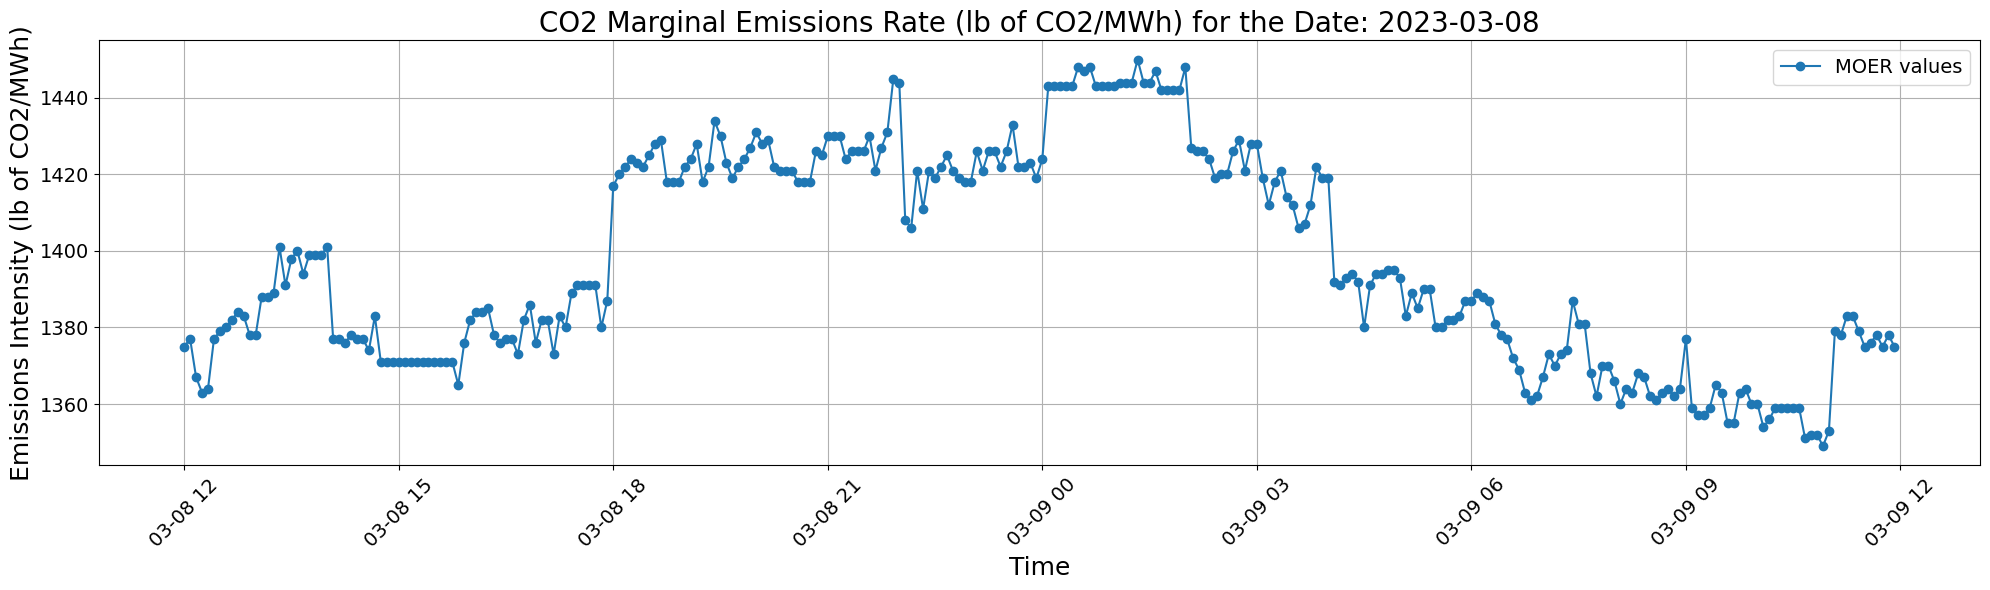

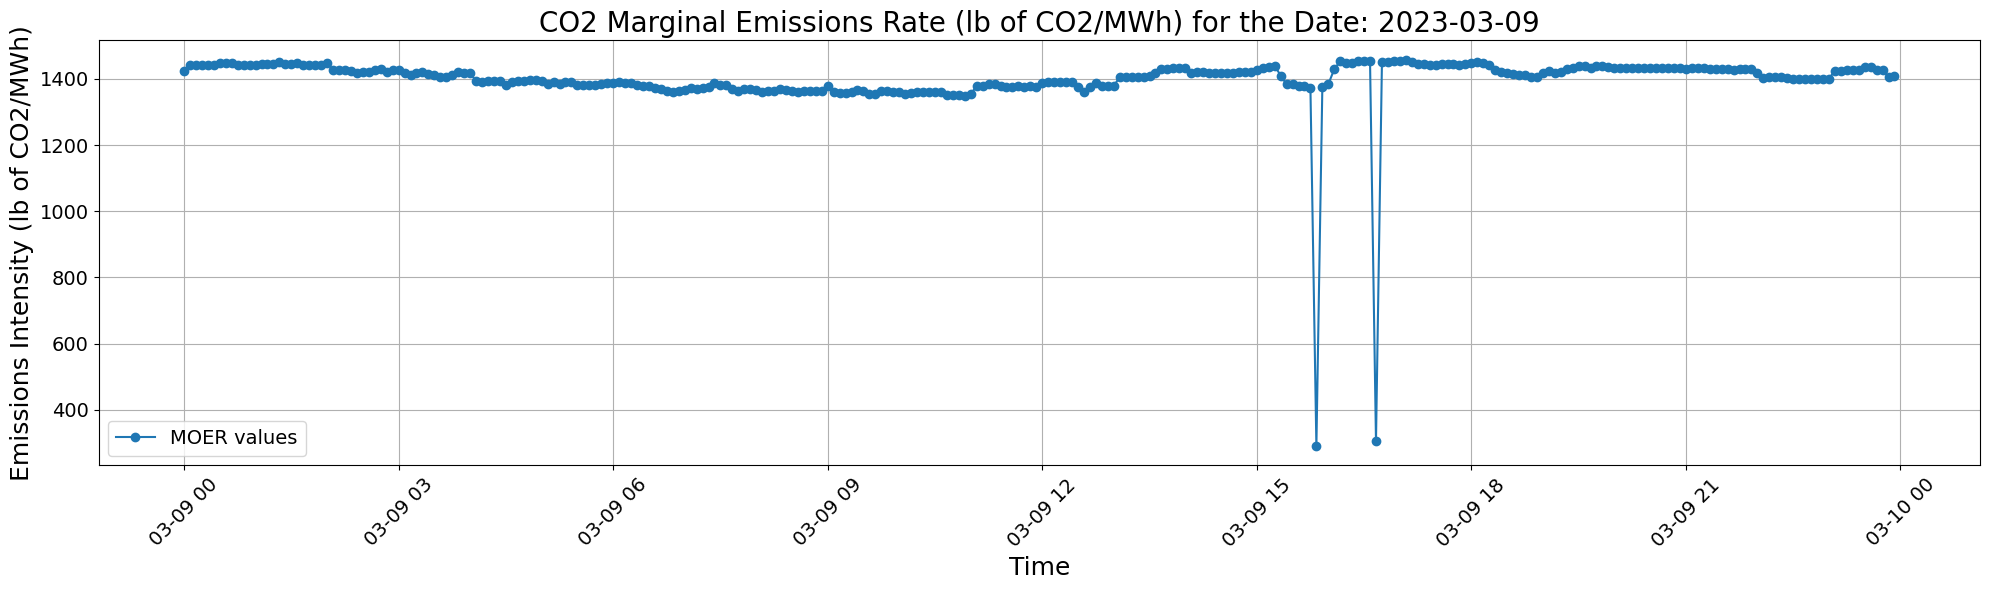



Day 69 Start 



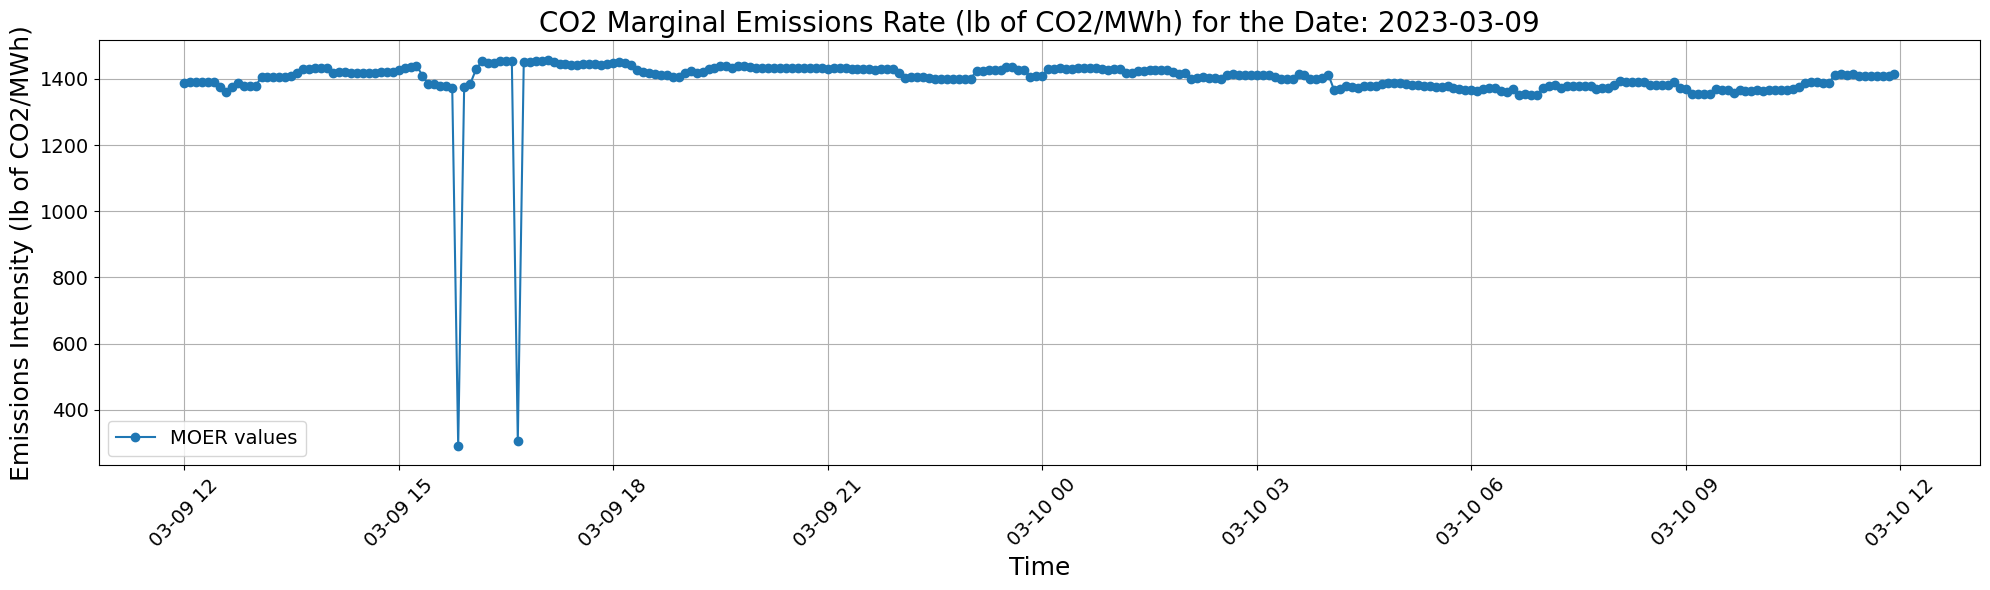

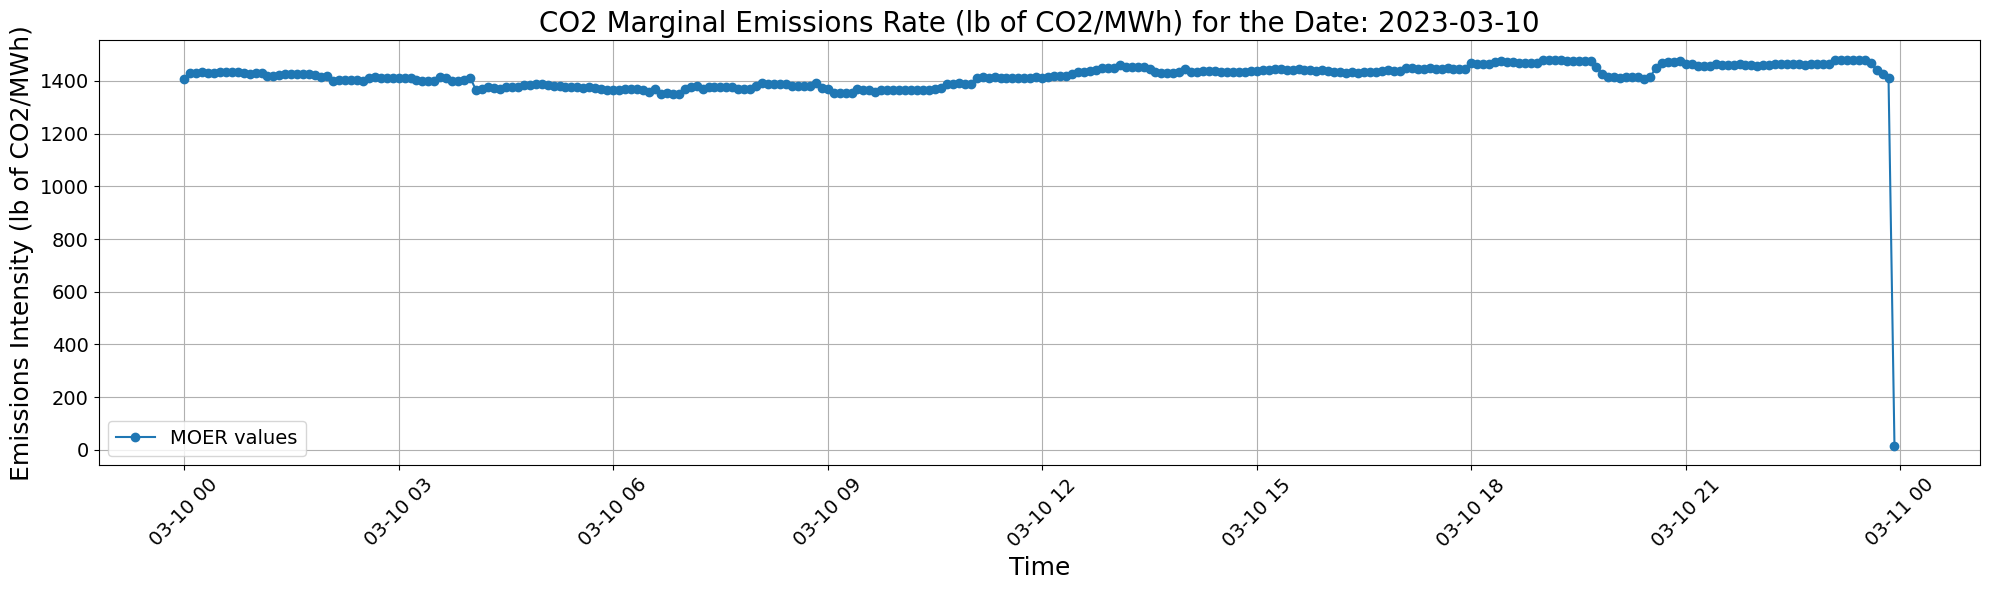



Day 70 Start 



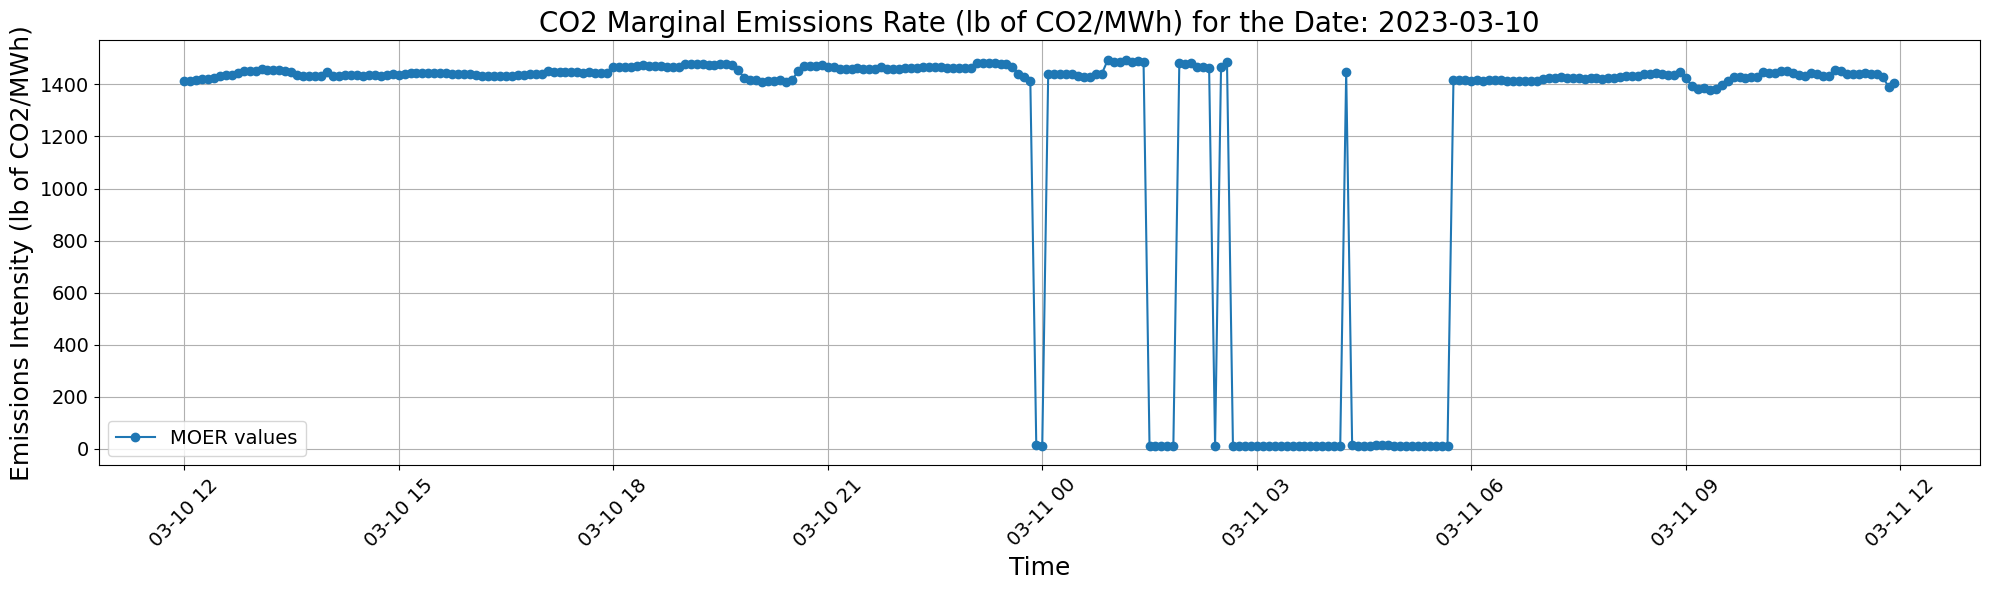

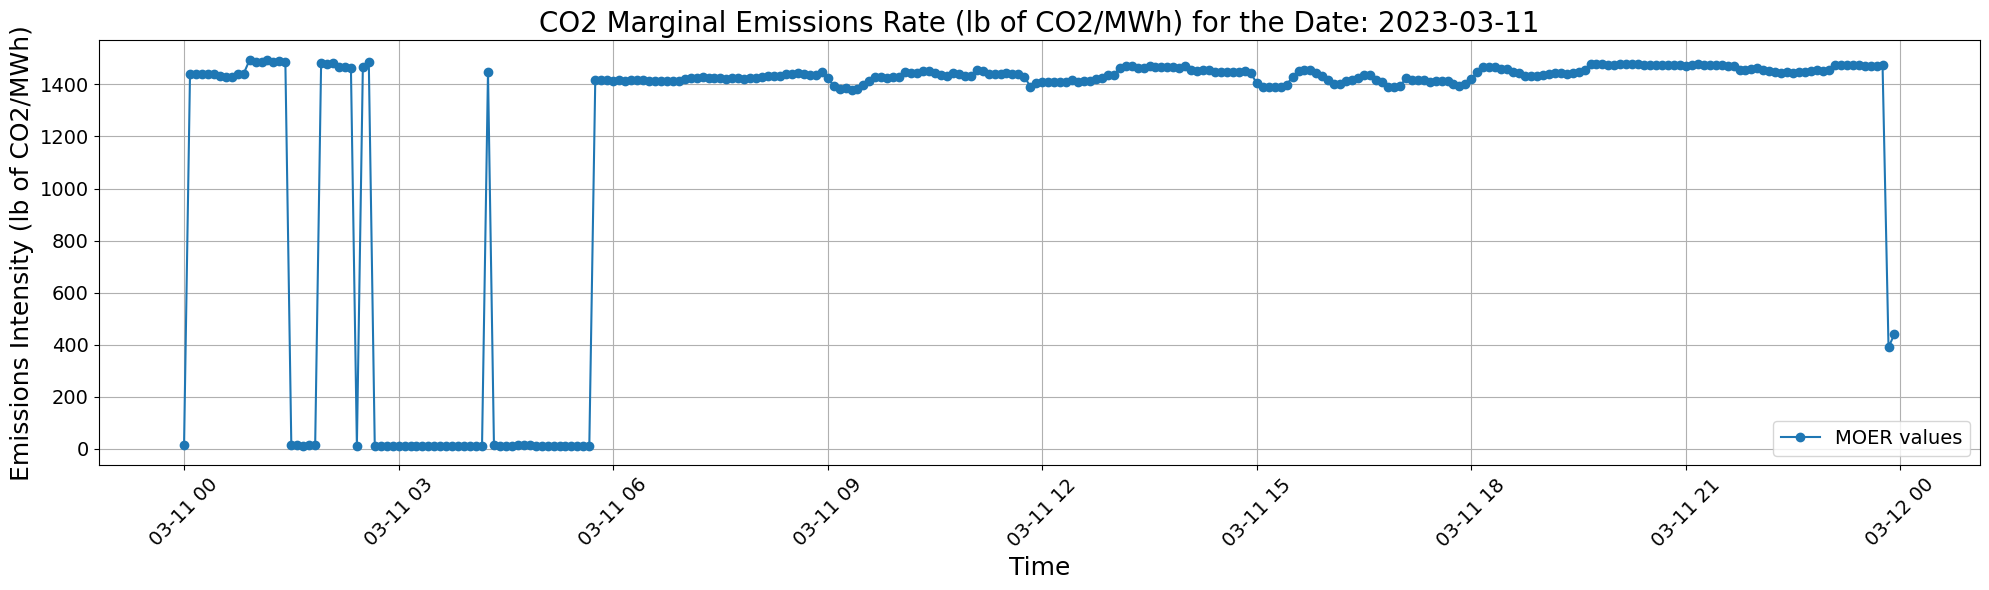



Day 71 Start 



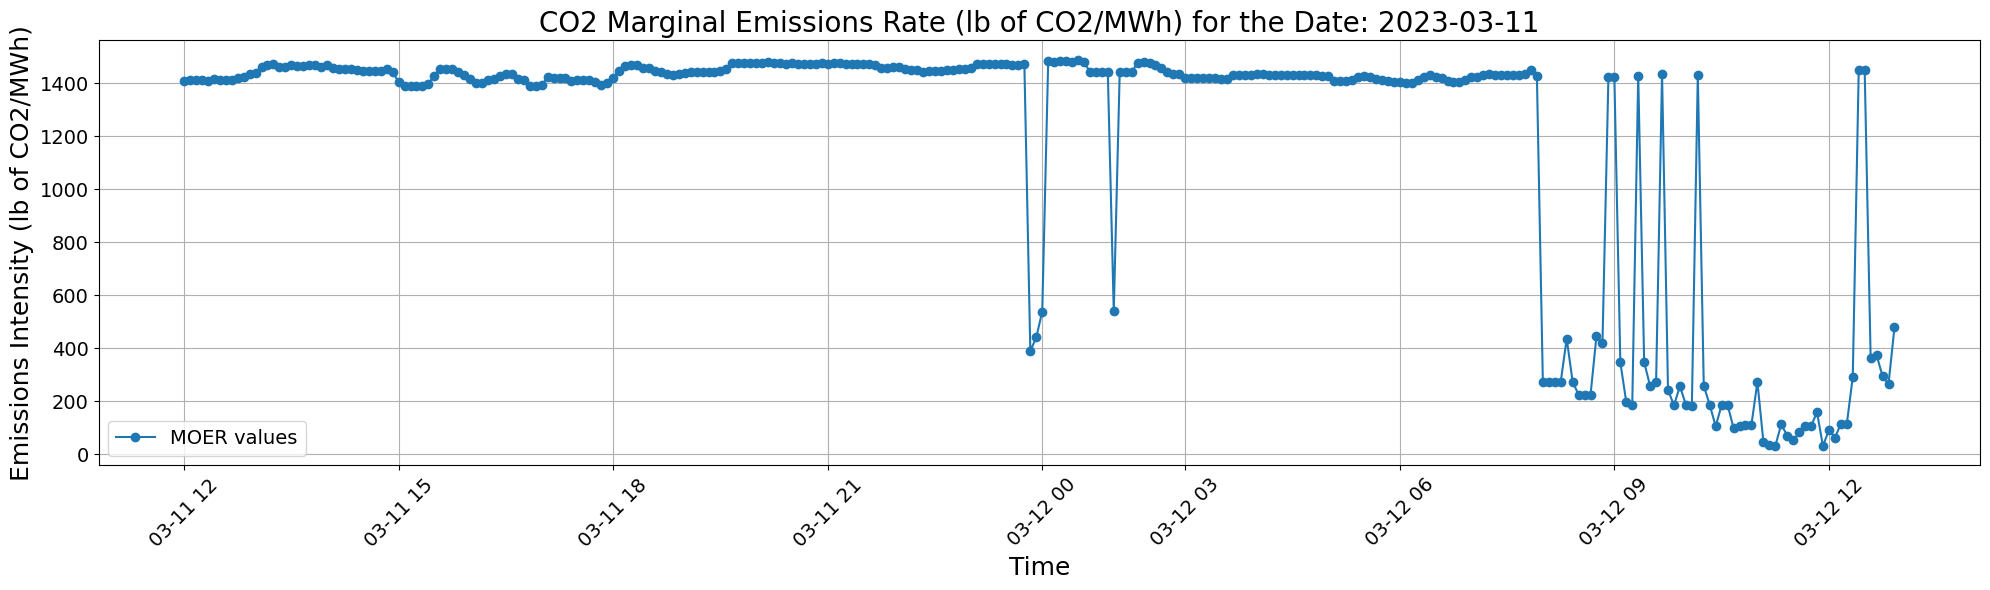

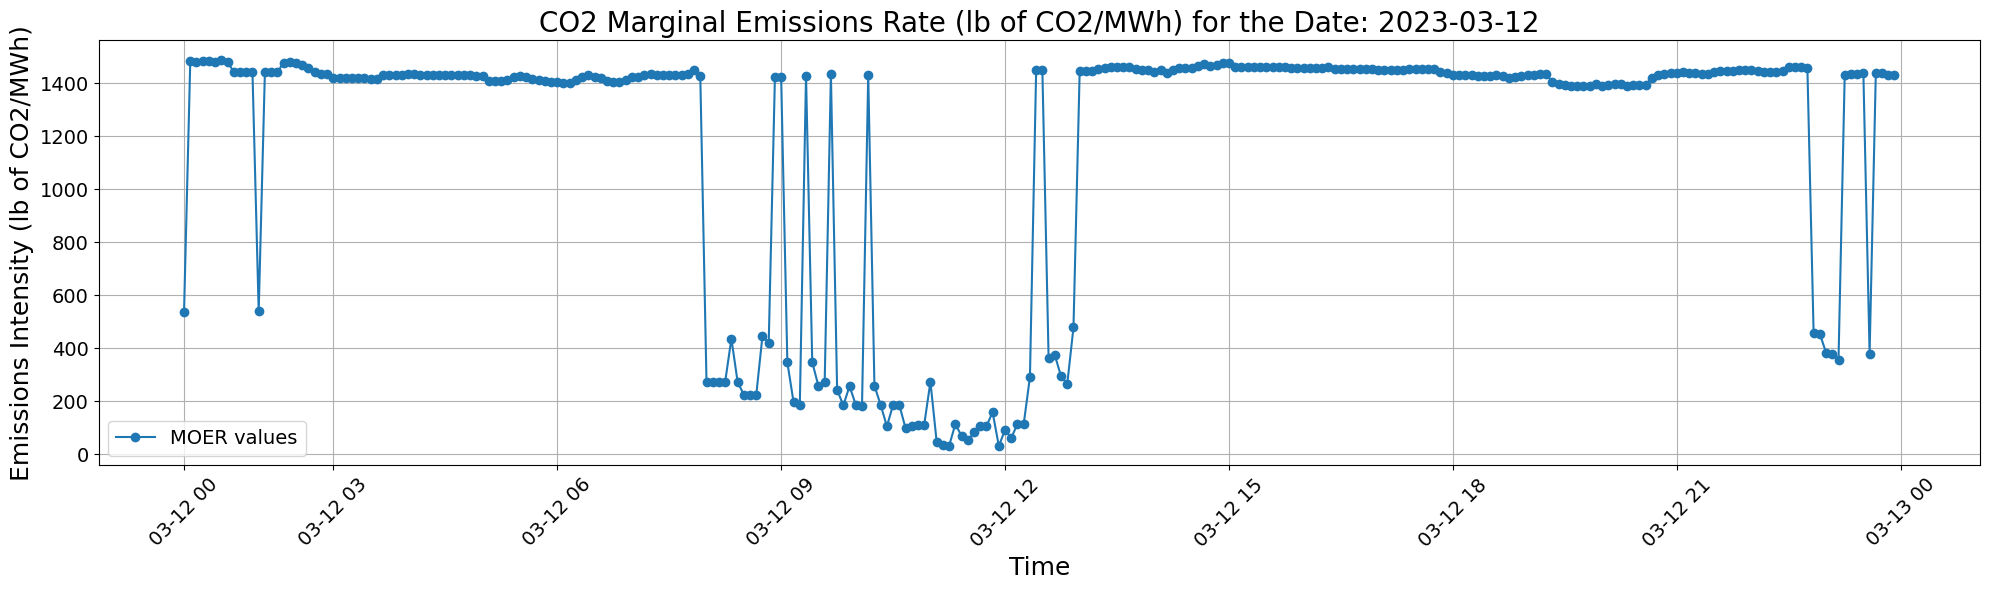



Day 72 Start 



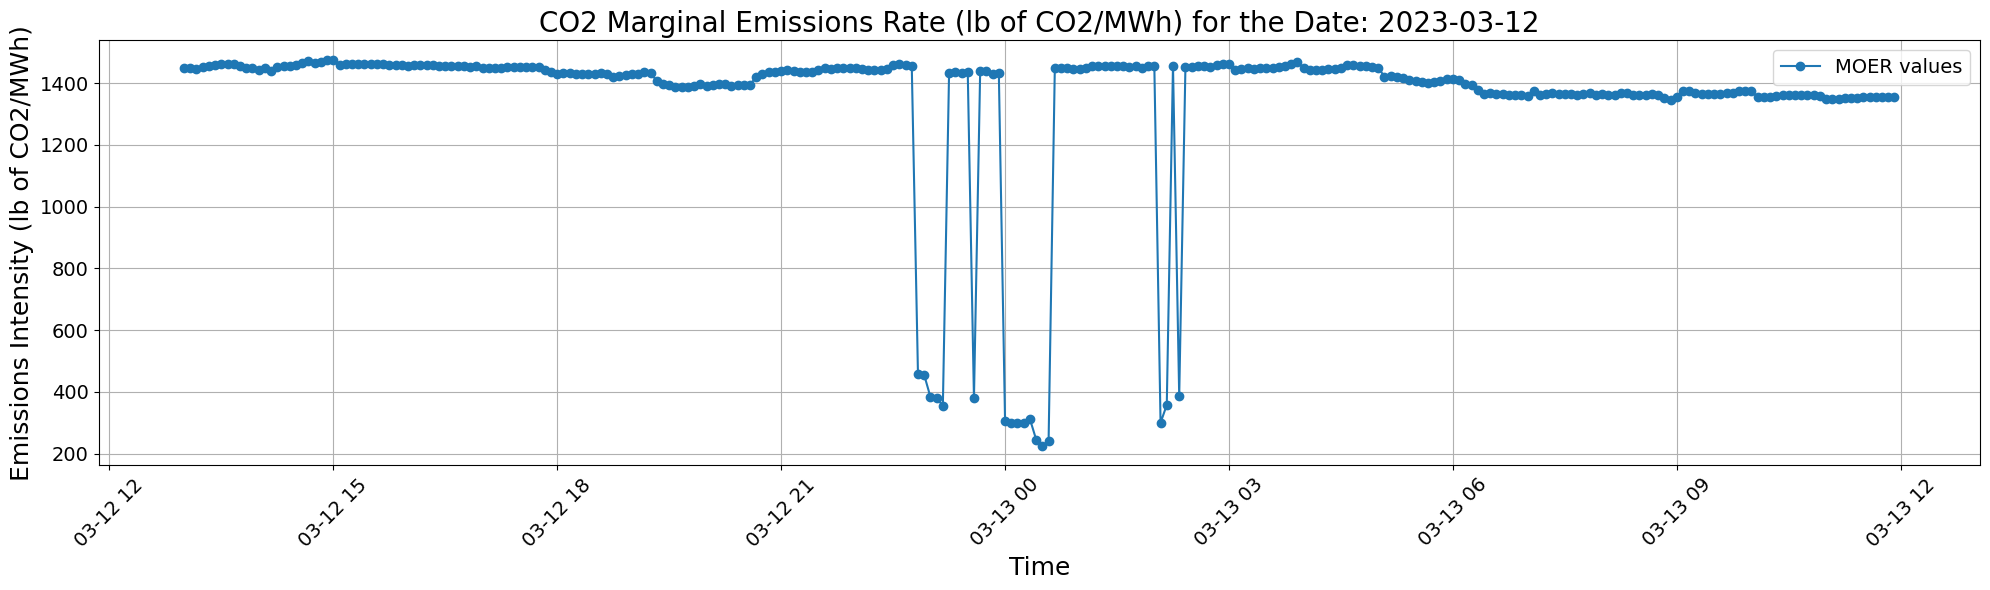

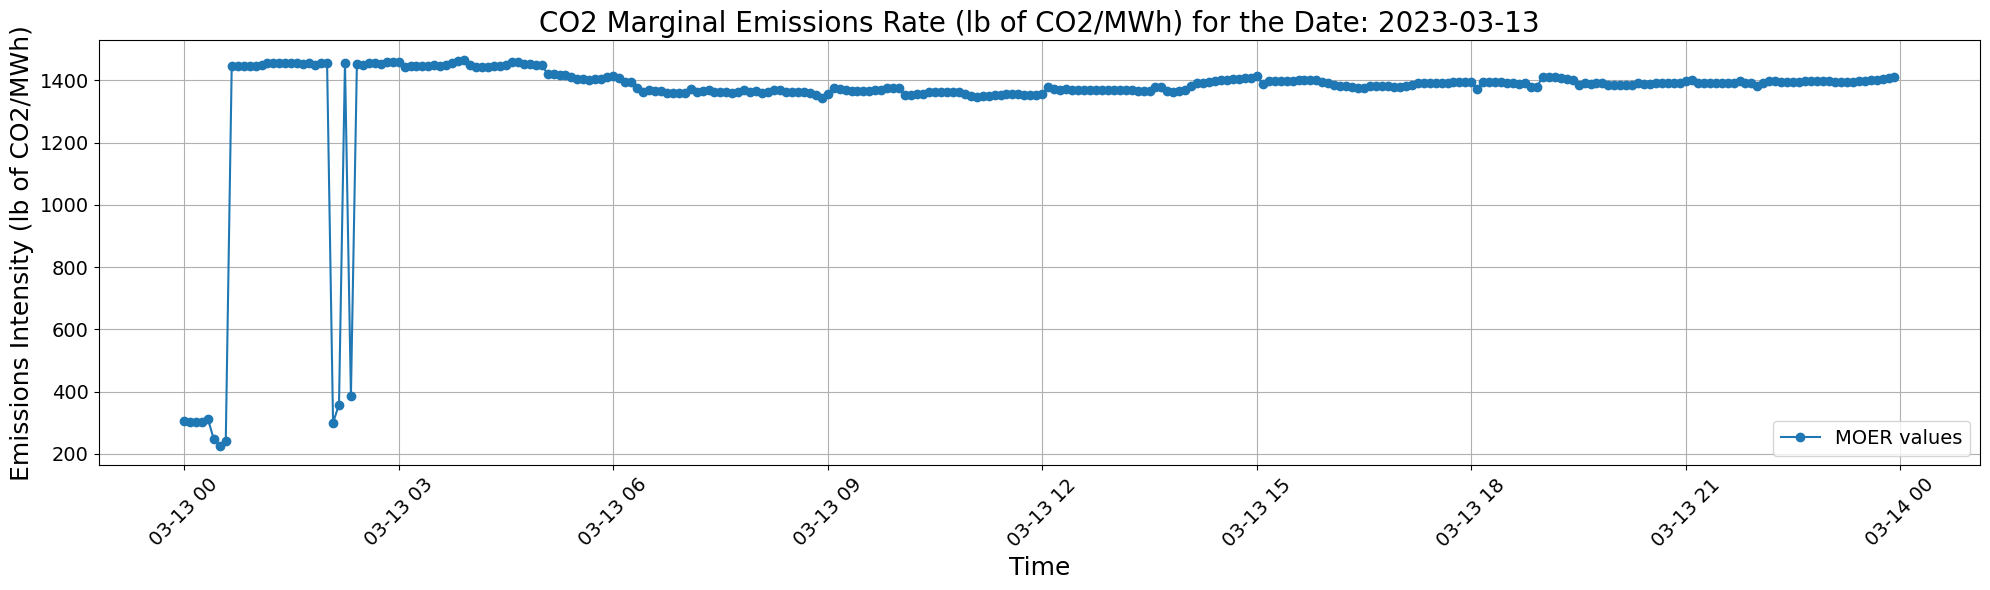

In [ ]:
# Plotting the first 5 dataframes from both the shifted df (noon to noon) and the unshifted df (midnight to midnight)
for i in range(67, 72):
  print(f'Day {i+1} Start \n')
  plot_time_series(daily_shifted_dataframes[i], day_long=True)
  plot_time_series(daily_dataframes[i], day_long=True)
  print('\n')


In [ ]:
# Ensuring that daily_dataframes and daily_shifted_dataframes have the same size, type and format for consistency

print(f'About daily_dataframes: \n\tSize: {len(daily_dataframes)} \
        \n\tType: {type(daily_dataframes)} \
        \n\tSize of first dataframe: {len(daily_dataframes[0])} \
        \n\tSize of second dataframe: {len(daily_dataframes[1])} \
        \n\tSize of second last dataframe: {len(daily_dataframes[-2])} \
        \n\tSize of last dataframe: {len(daily_dataframes[-1])}')
print(f'About daily_shifted_dataframes: \n\tSize: {len(daily_shifted_dataframes)} \
       \n\tType: {type(daily_shifted_dataframes)} \
       \n\tSize of first dataframe: {len(daily_shifted_dataframes[0])} \
       \n\tSize of second dataframe: {len(daily_shifted_dataframes[1])} \
       \n\tSize of second last dataframe: {len(daily_shifted_dataframes[-2])} \
       \n\tSize of last dataframe: {len(daily_shifted_dataframes[-1])}')

About daily_dataframes: 
	Size: 366         
	Type: <class 'list'>         
	Size of first dataframe: 288         
	Size of second dataframe: 288         
	Size of second last dataframe: 288         
	Size of last dataframe: 1
About daily_shifted_dataframes: 
	Size: 366        
	Type: <class 'list'>        
	Size of first dataframe: 144        
	Size of second dataframe: 288        
	Size of second last dataframe: 288        
	Size of last dataframe: 145


# 2. Removing the first and the last dataframesas they only have information for half the night

In [ ]:
# Removing the first and the last elements from the daily_shifted_dataframes array
daily_shifted_dfs = daily_shifted_dataframes.copy()

# Deleting the first and the last element from daily_shifted_dfs
print(f'Initial Length: {len(daily_shifted_dfs)}')
daily_shifted_dfs = daily_shifted_dfs[1:-1]
print(f'Final Length: {len(daily_shifted_dfs)}')


Initial Length: 366
Final Length: 364


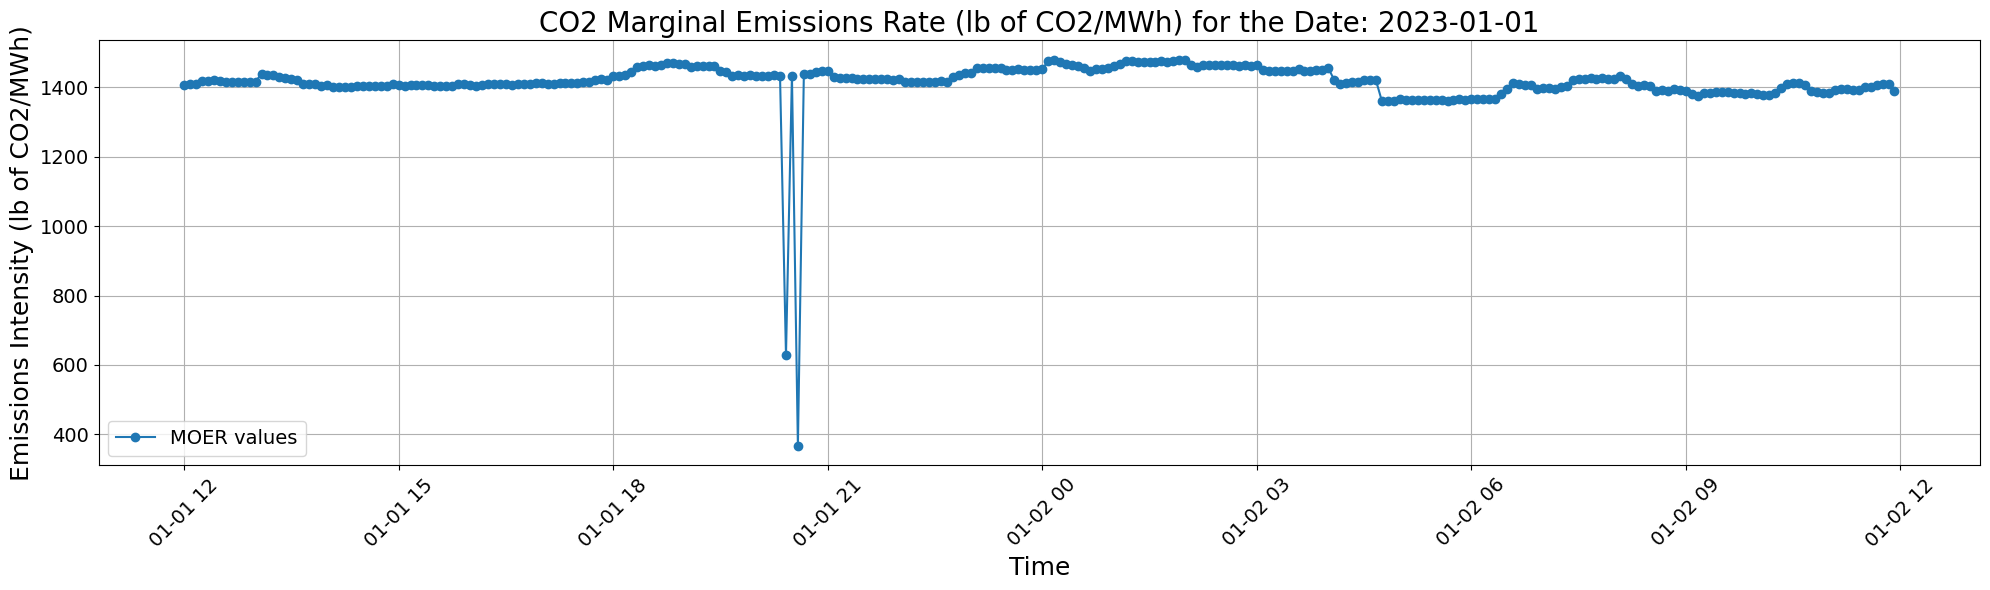

In [ ]:
# Plotting the first complete shifted df of the year
plot_time_series(daily_shifted_dfs[0], day_long=True)

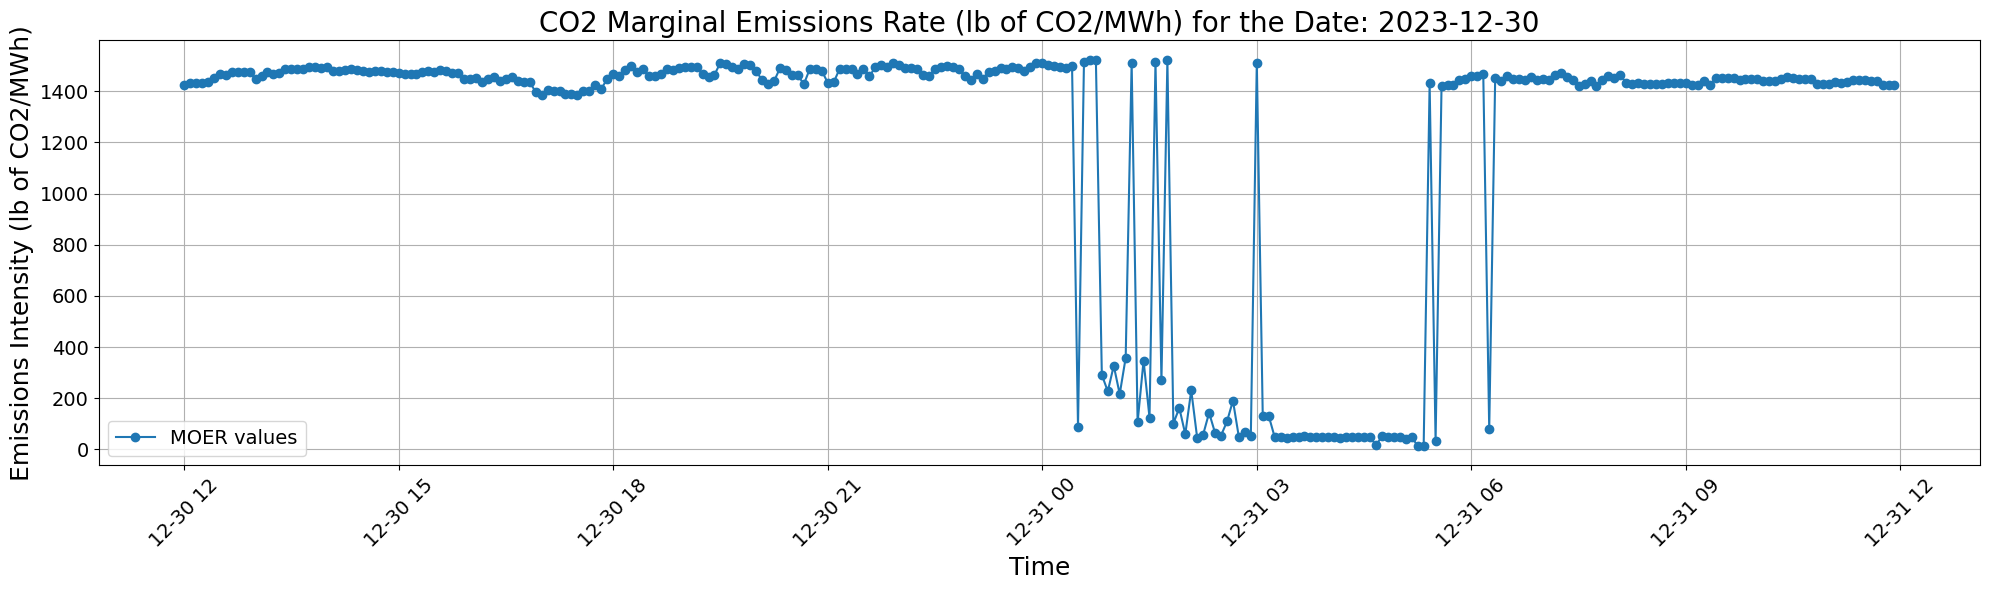

In [ ]:
# Potting the last complete shifted df of the year
plot_time_series(daily_shifted_dfs[-1], day_long=True)

In [ ]:
print(f'About daily_dataframes: \n\tSize: {len(daily_dataframes)} \
        \n\tType: {type(daily_dataframes)} \
        \n\tSize of first dataframe: {len(daily_dataframes[0])} \
        \n\tSize of second dataframe: {len(daily_dataframes[1])} \
        \n\tSize of second last dataframe: {len(daily_dataframes[-2])} \
        \n\tSize of last dataframe: {len(daily_dataframes[-1])}')
print(f'About daily_shifted_dataframes: \n\tSize: {len(daily_shifted_dfs)} \
       \n\tType: {type(daily_shifted_dfs)} \
       \n\tSize of first dataframe: {len(daily_shifted_dfs[0])} \
       \n\tSize of second dataframe: {len(daily_shifted_dfs[1])} \
       \n\tSize of second last dataframe: {len(daily_shifted_dfs[-2])} \
       \n\tSize of last dataframe: {len(daily_shifted_dfs[-1])}')

About daily_dataframes: 
	Size: 366         
	Type: <class 'list'>         
	Size of first dataframe: 288         
	Size of second dataframe: 288         
	Size of second last dataframe: 288         
	Size of last dataframe: 1
About daily_shifted_dataframes: 
	Size: 364        
	Type: <class 'list'>        
	Size of first dataframe: 288        
	Size of second dataframe: 288        
	Size of second last dataframe: 288        
	Size of last dataframe: 288


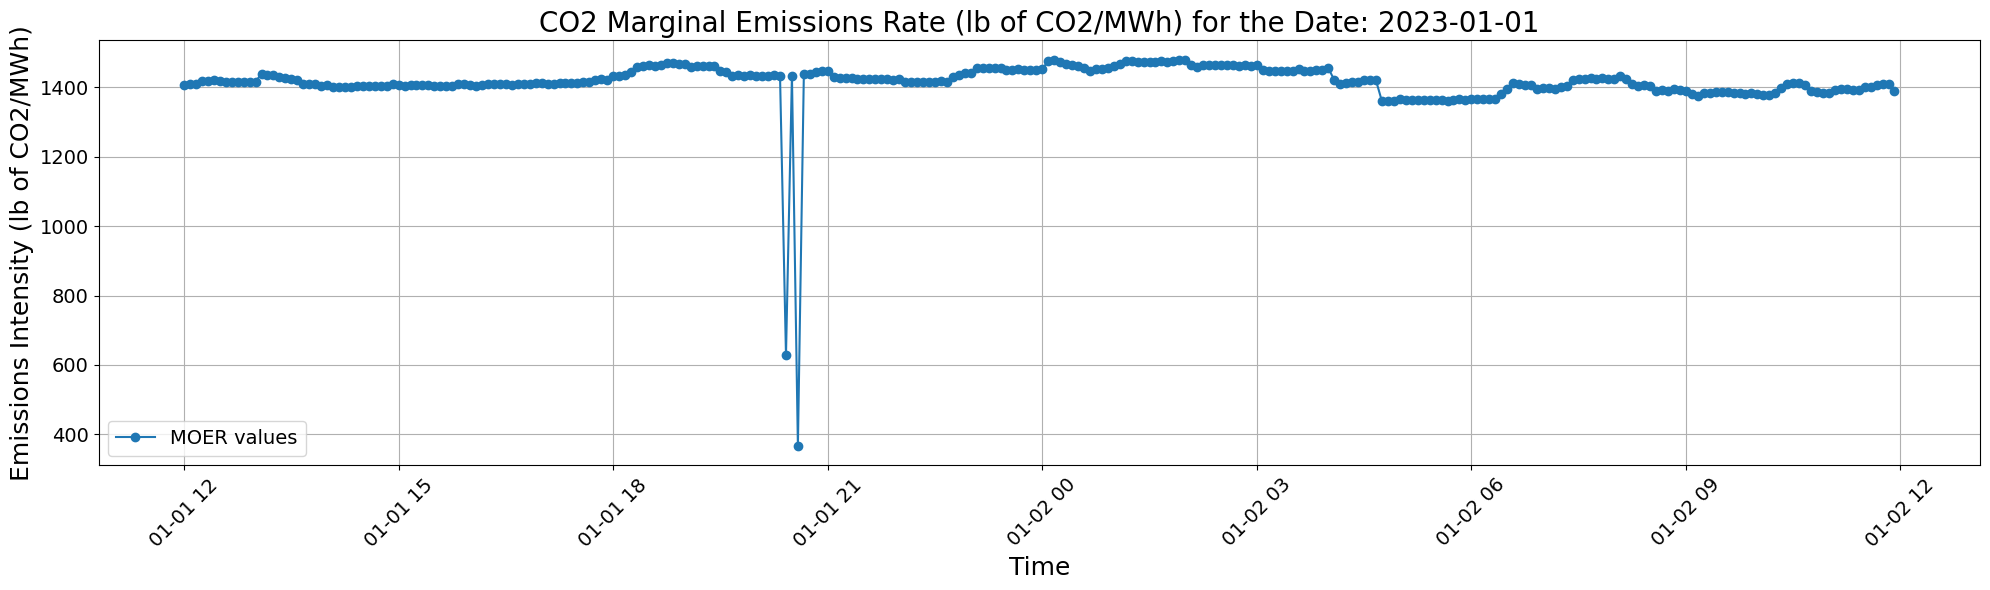

In [ ]:
# Observing the daily shifted df
plot_time_series(daily_shifted_dfs[0], day_long=True)


# 3. Extract night intervals from the daily shifted dataframes




In [ ]:


def extract_night_interval(daily_dfs):
    """
    Extracts the time interval from 9pm to 6am from all daily dataframes in the list.

    Args:
    - daily_dfs (list): A list of daily dataframes for the entire year.

    Returns:
    - night_dfs (list): A list of dataframes containing the time interval from 9pm to 6am for each day.
    """
    start_time = pd.Timestamp('21:00:00').time()
    end_time = pd.Timestamp('06:00:00').time()
    night_dfs = []

    for daily_df in daily_dfs:
        night_df = daily_df.between_time(start_time, end_time)
        night_dfs.append(night_df)

    return night_dfs

# Example usage
# Assuming daily_shifted_dfs is a list of daily dataframes for the entire year
daily_shifted_dfs_copy = daily_shifted_dfs.copy()
night_dfs = extract_night_interval(daily_shifted_dfs_copy)

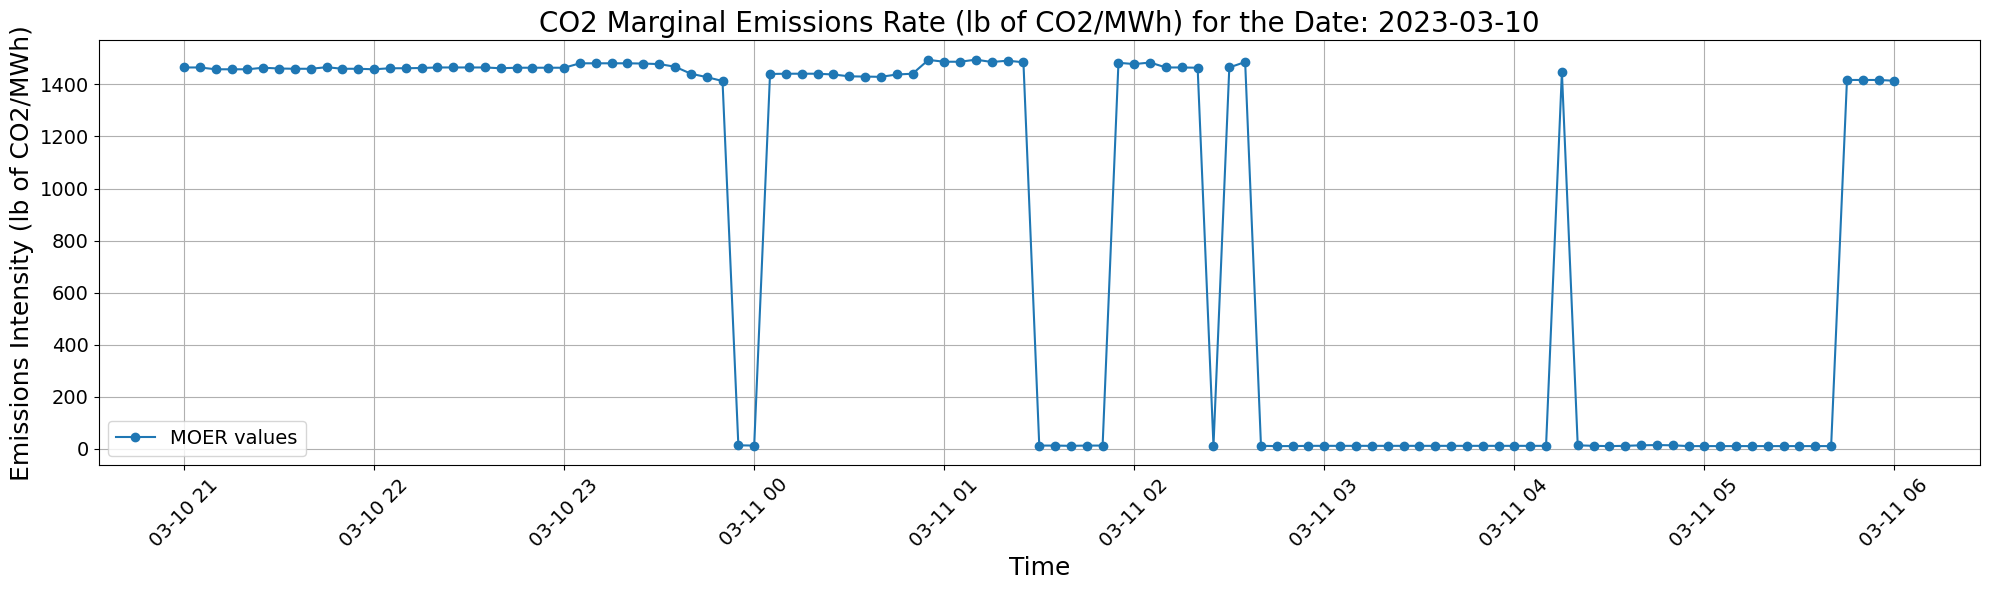

In [ ]:
# Observing the time series
plot_time_series(night_dfs[68], day_long=True)

# 4. Adding additional column to the dataframe which marks the lowest n values

In [ ]:
def add_lowest_n_column_to_dfs(dfs, n):
    for df in dfs:
        # Find the lowest n values of 'moer_lb_per_mwh'
        lowest_n = df['moer_lb_per_mwh'].nsmallest(n)

        # Create a boolean mask to mark the lowest n rows
        df.loc[:,'lowest_n'] = df['moer_lb_per_mwh'].isin(lowest_n)

    return dfs

night_dfs_copy = night_dfs.copy()
night_dfs_with_lowest_n_vals = add_lowest_n_column_to_dfs(dfs=night_dfs_copy, n=22)

<ipython-input-28-1ef637fb26f2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'lowest_n'] = df['moer_lb_per_mwh'].isin(lowest_n)
<ipython-input-28-1ef637fb26f2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'lowest_n'] = df['moer_lb_per_mwh'].isin(lowest_n)
<ipython-input-28-1ef637fb26f2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

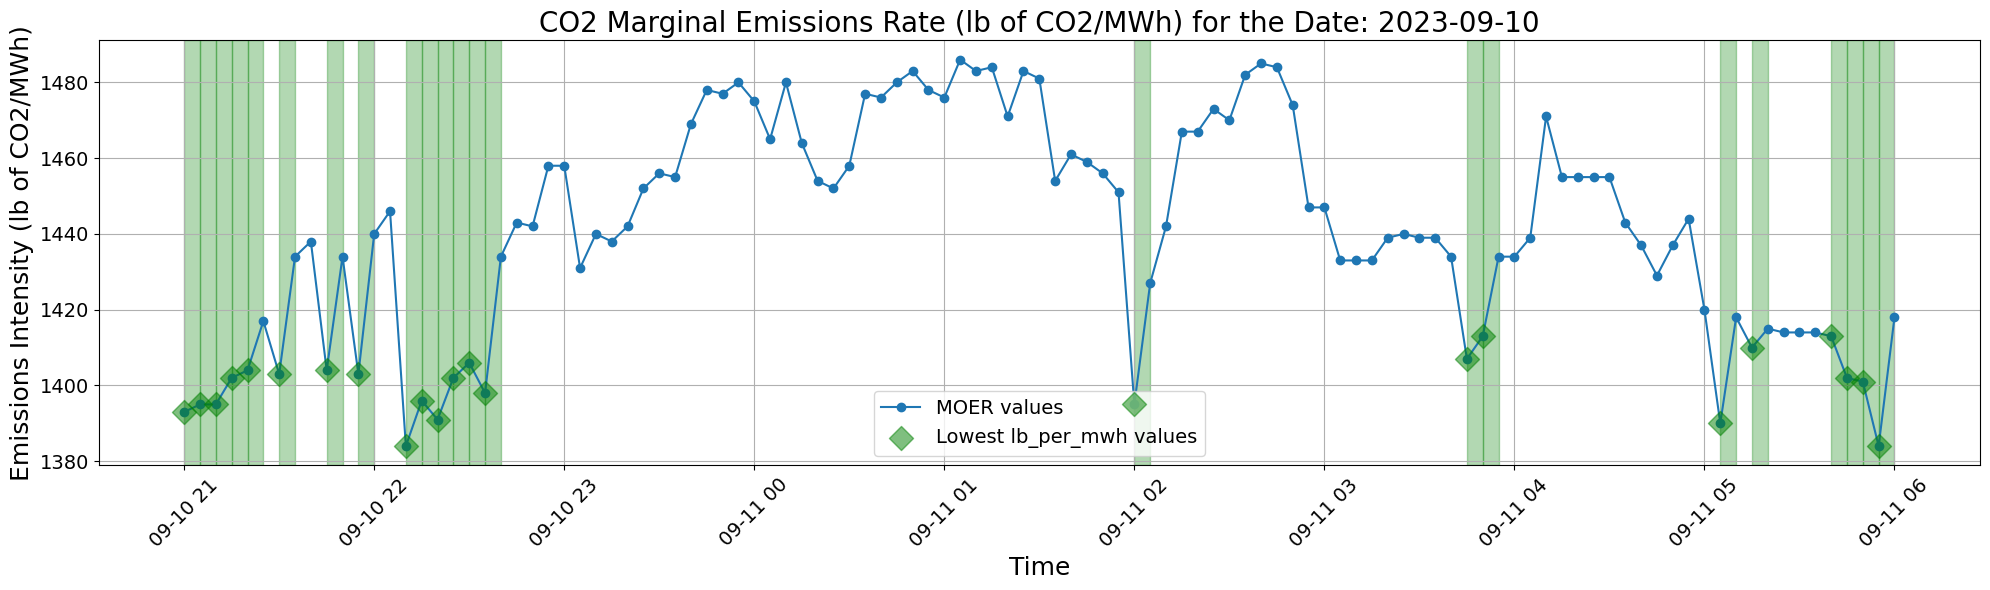

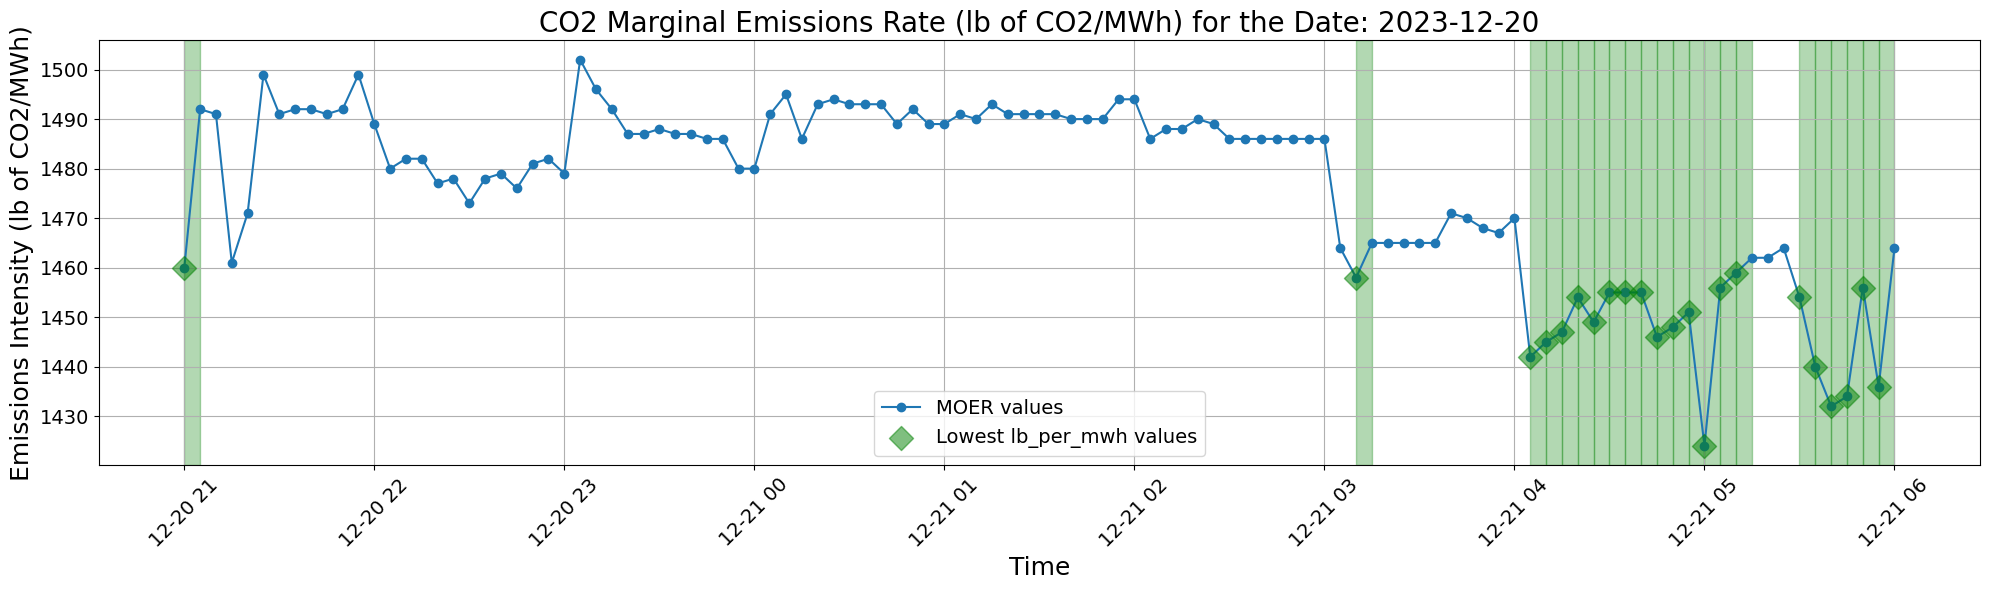

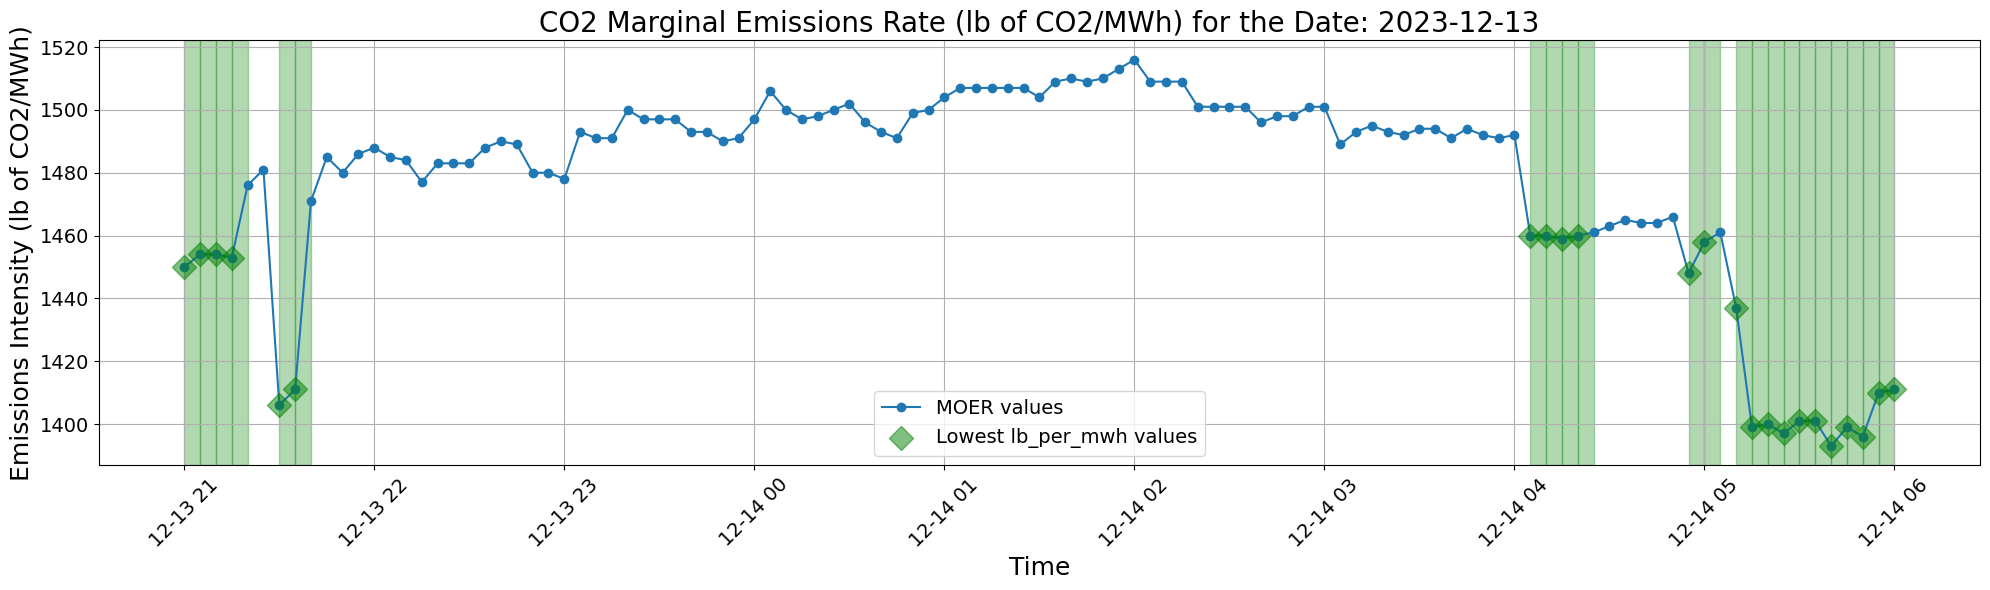

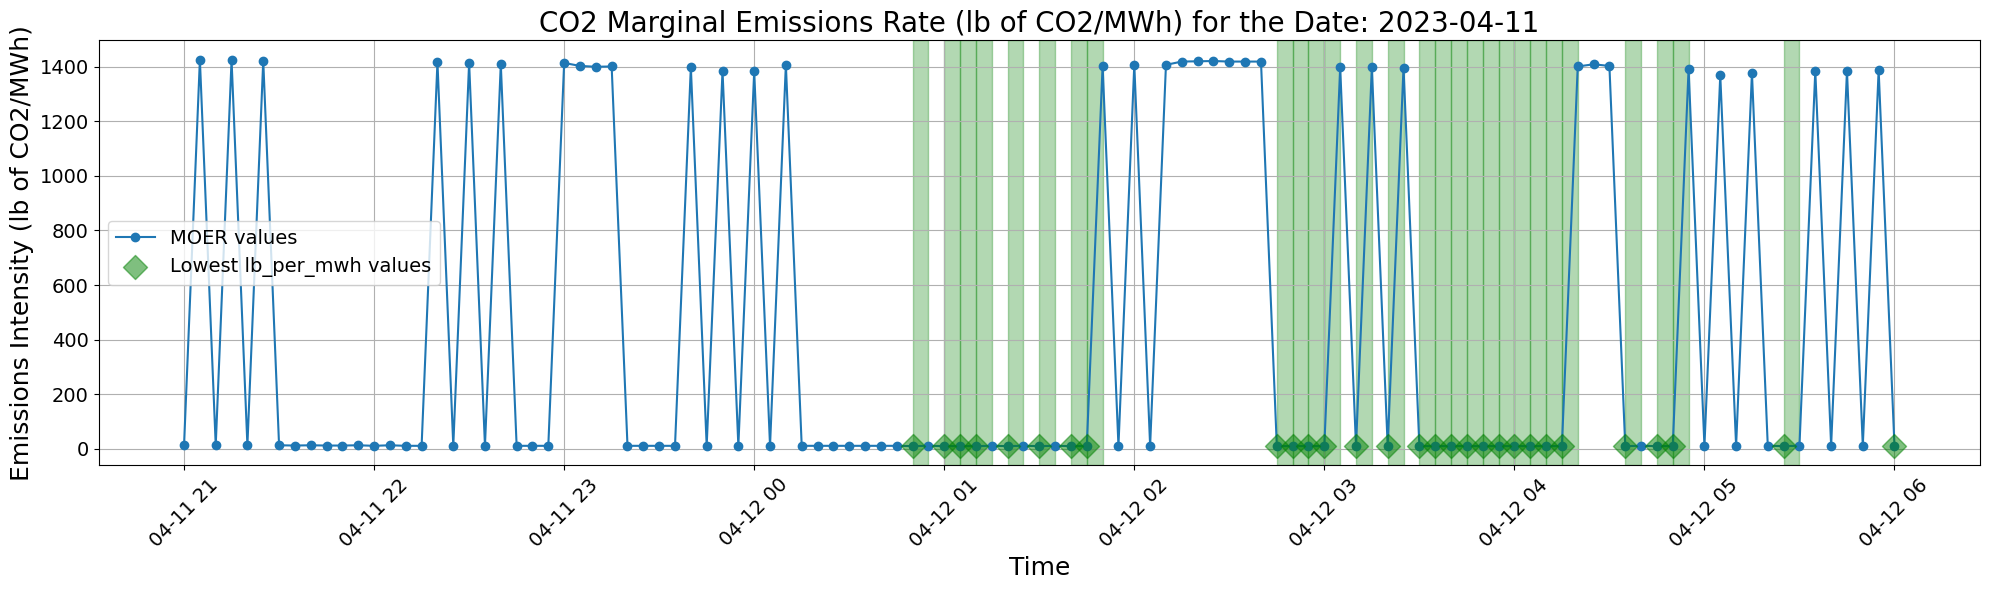

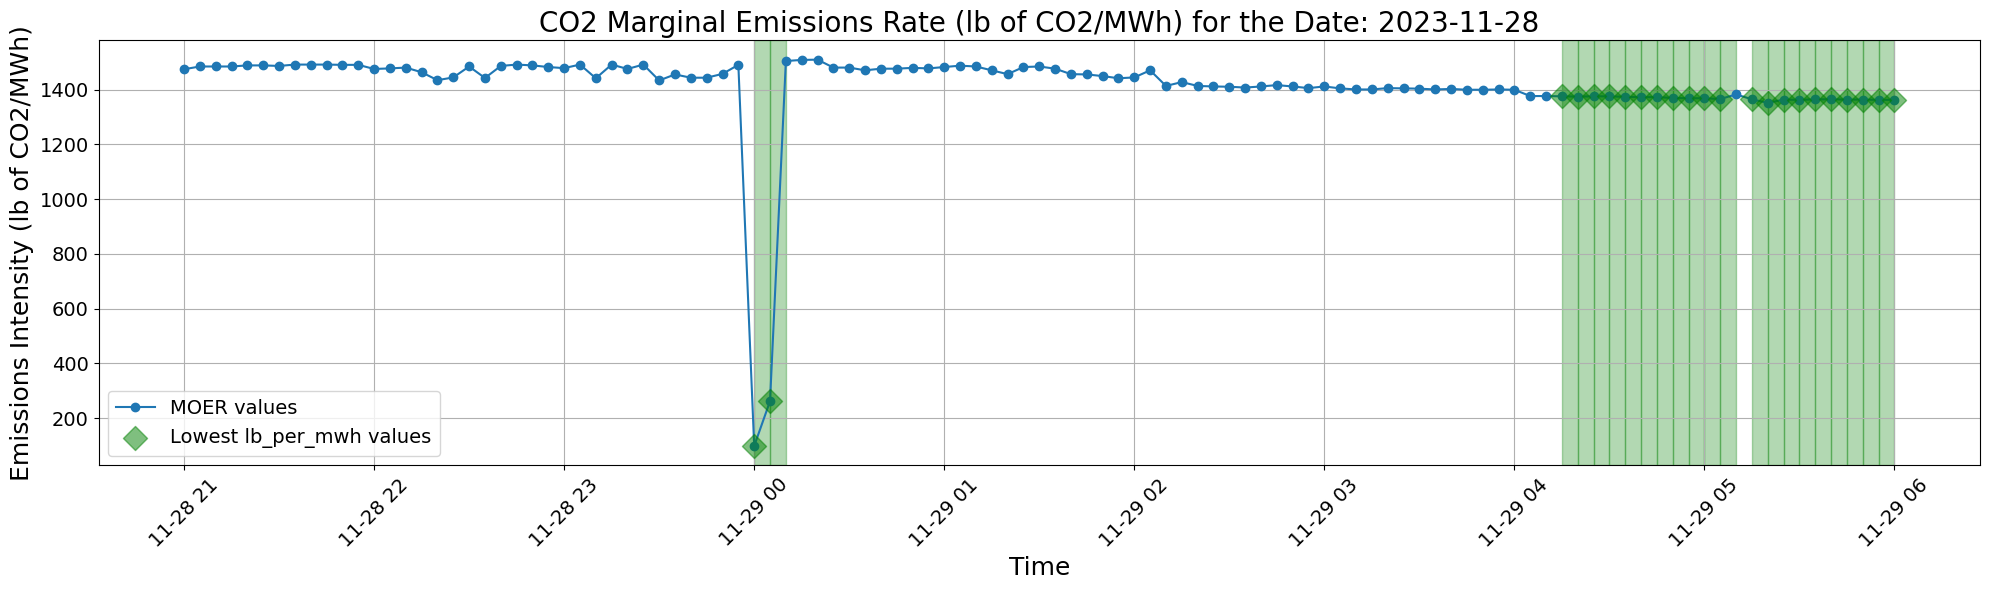

In [ ]:
# Plot five days randomly to observe how the best time intervals for charging the electric vehicle are found

random_night_dfs_with_lowest_n_vals = random.sample(night_dfs_with_lowest_n_vals, 5)

# Print the separate DataFrames (from 9pm to 6am)
for night_df in random_night_dfs_with_lowest_n_vals:
    plot_time_series(df=night_df, day_long=True, mark_lowest_n=True)

# plot_time_series(night_dfs_with_lowest_n_vals[16], mark_lowest_n=True)


# 5. Adding additional column to the dataframe which marks the baseline Charging Time interval




In [ ]:
# Adding another column to signify current charging time

def add_baseline_charging_column_to_dfs(dfs):
    for df in dfs:
        # Adding another column for baseline charging time
        df['baseline_charging'] = ((df.index.hour == 0) | ((df.index.hour == 1) & (df.index.minute < 50)))

    return dfs


night_dfs_with_lowest_n_vals_copy = night_dfs_with_lowest_n_vals.copy()
night_dfs_with_current_n_recommended_charging = add_baseline_charging_column_to_dfs(night_dfs_with_lowest_n_vals_copy)

<ipython-input-30-57f473653447>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['baseline_charging'] = ((df.index.hour == 0) | ((df.index.hour == 1) & (df.index.minute < 50)))
<ipython-input-30-57f473653447>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['baseline_charging'] = ((df.index.hour == 0) | ((df.index.hour == 1) & (df.index.minute < 50)))
<ipython-input-30-57f473653447>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

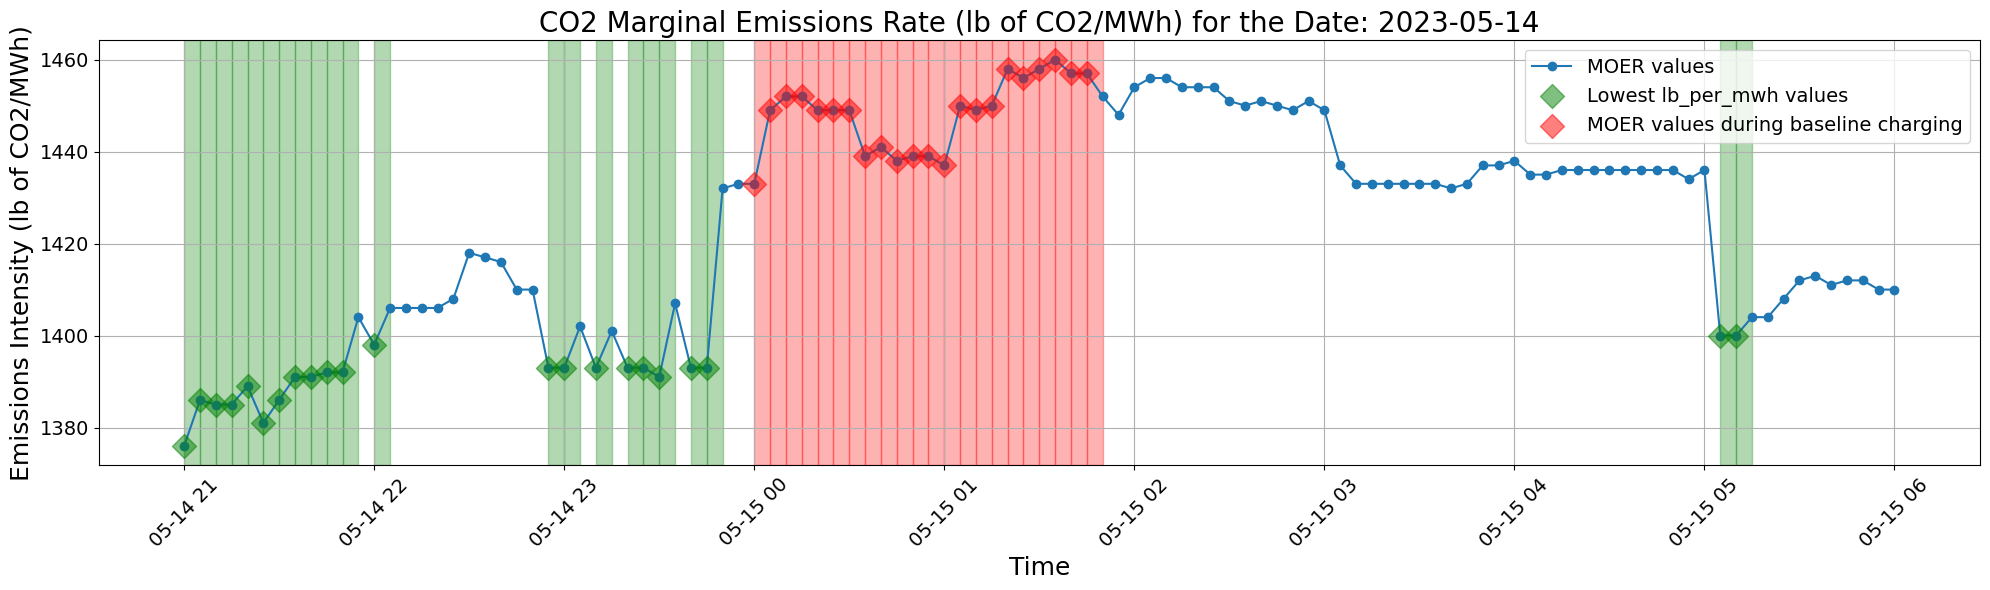

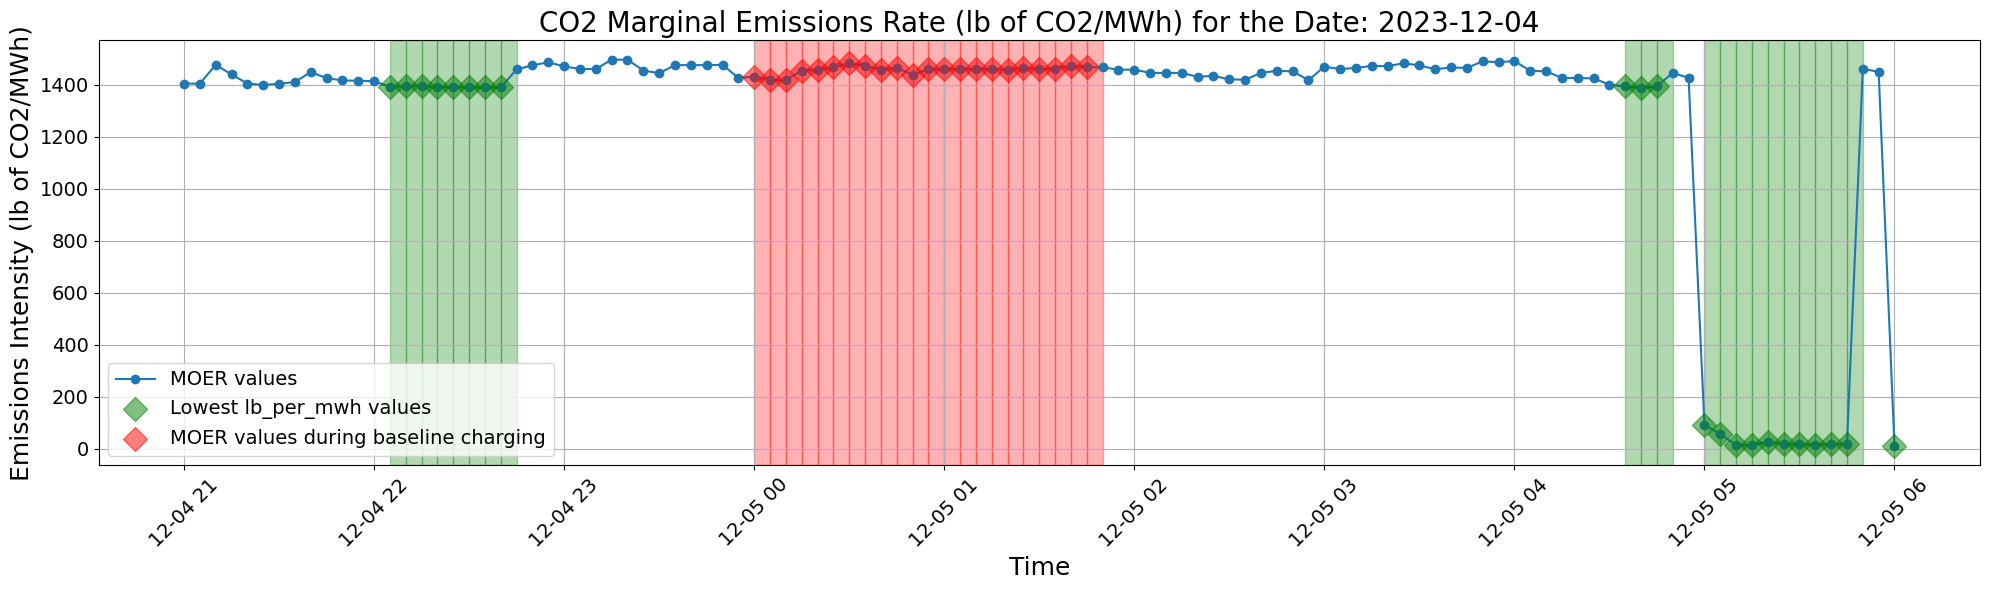

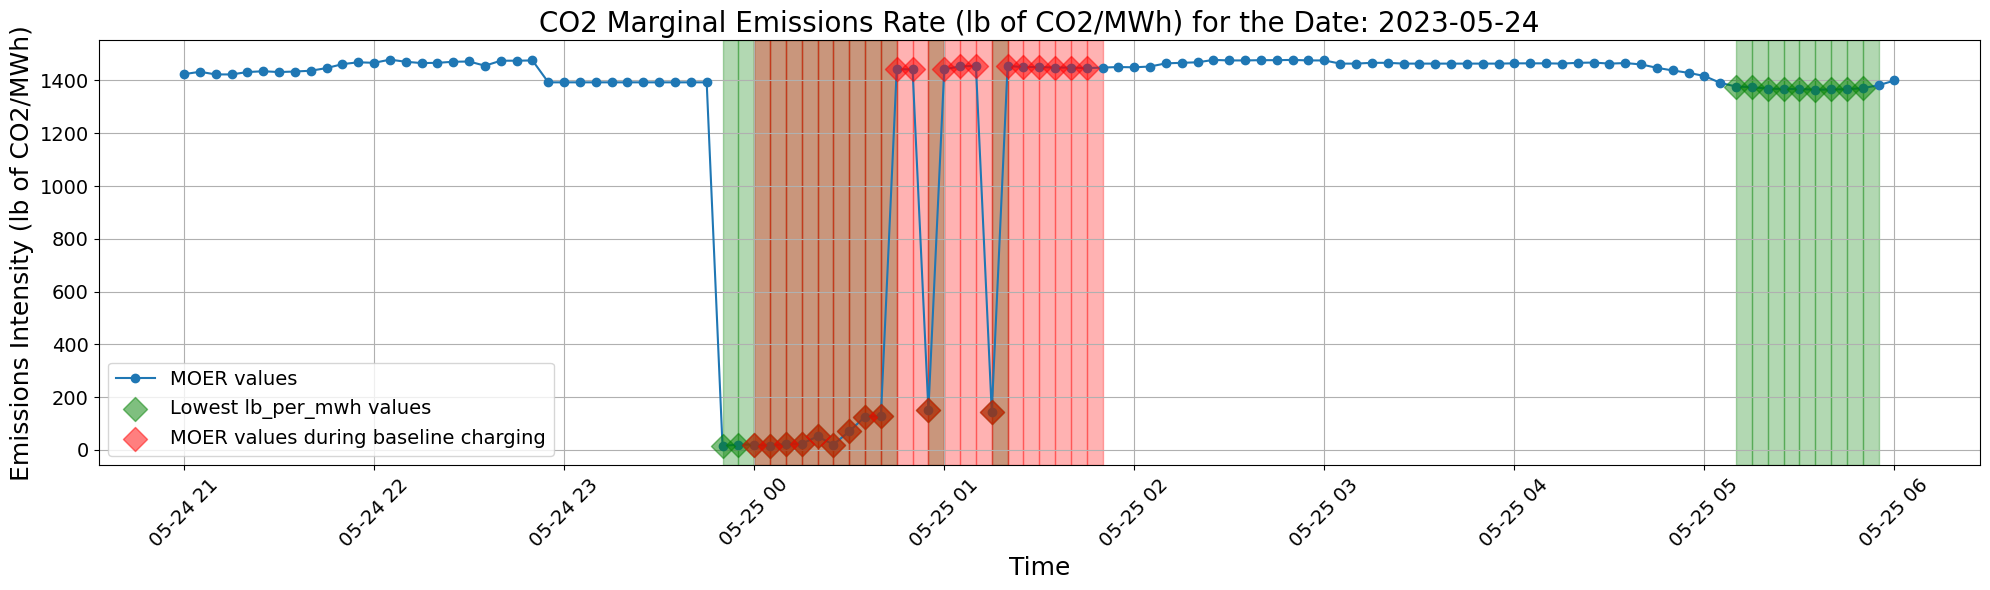

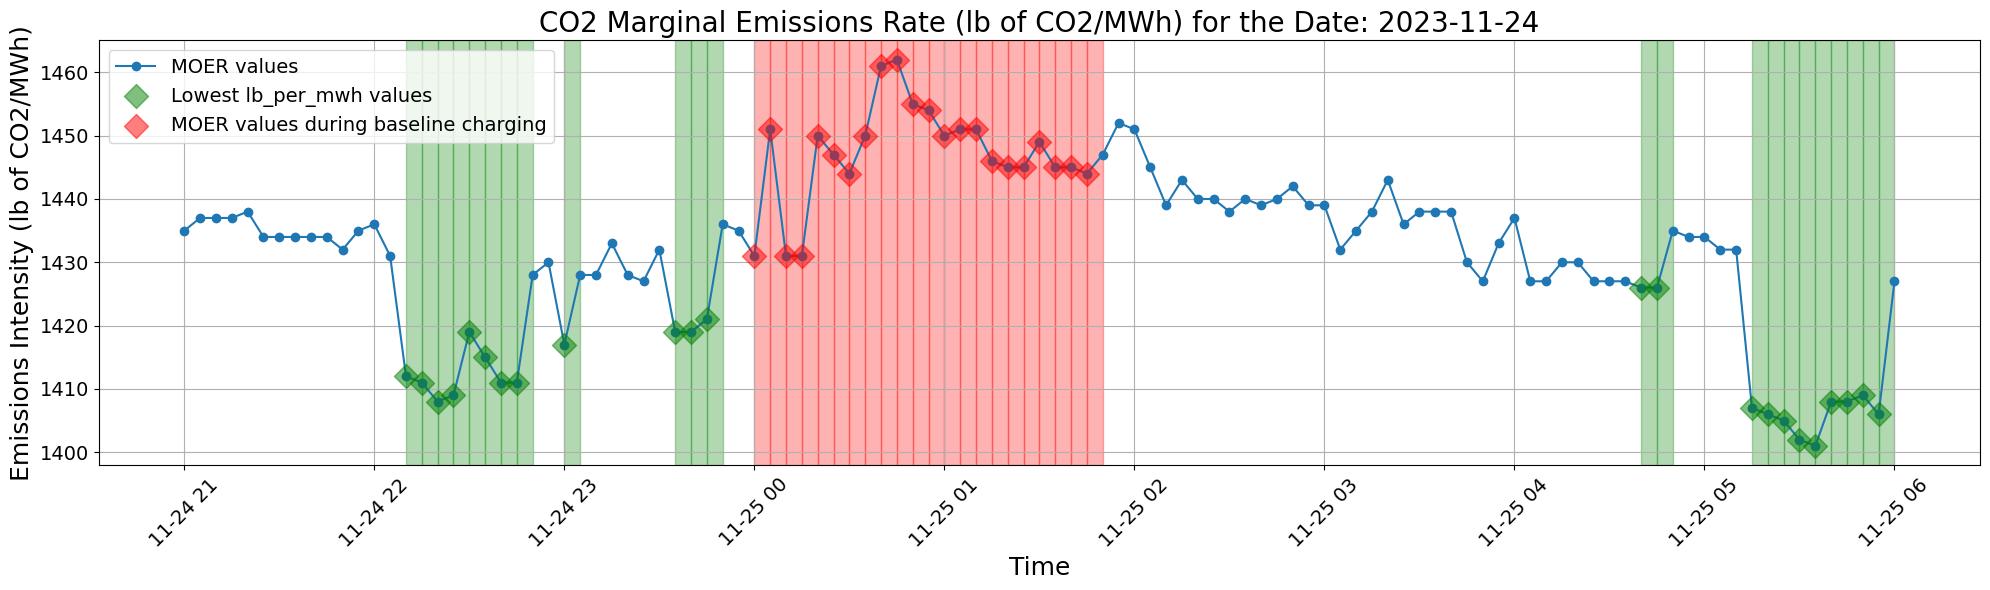

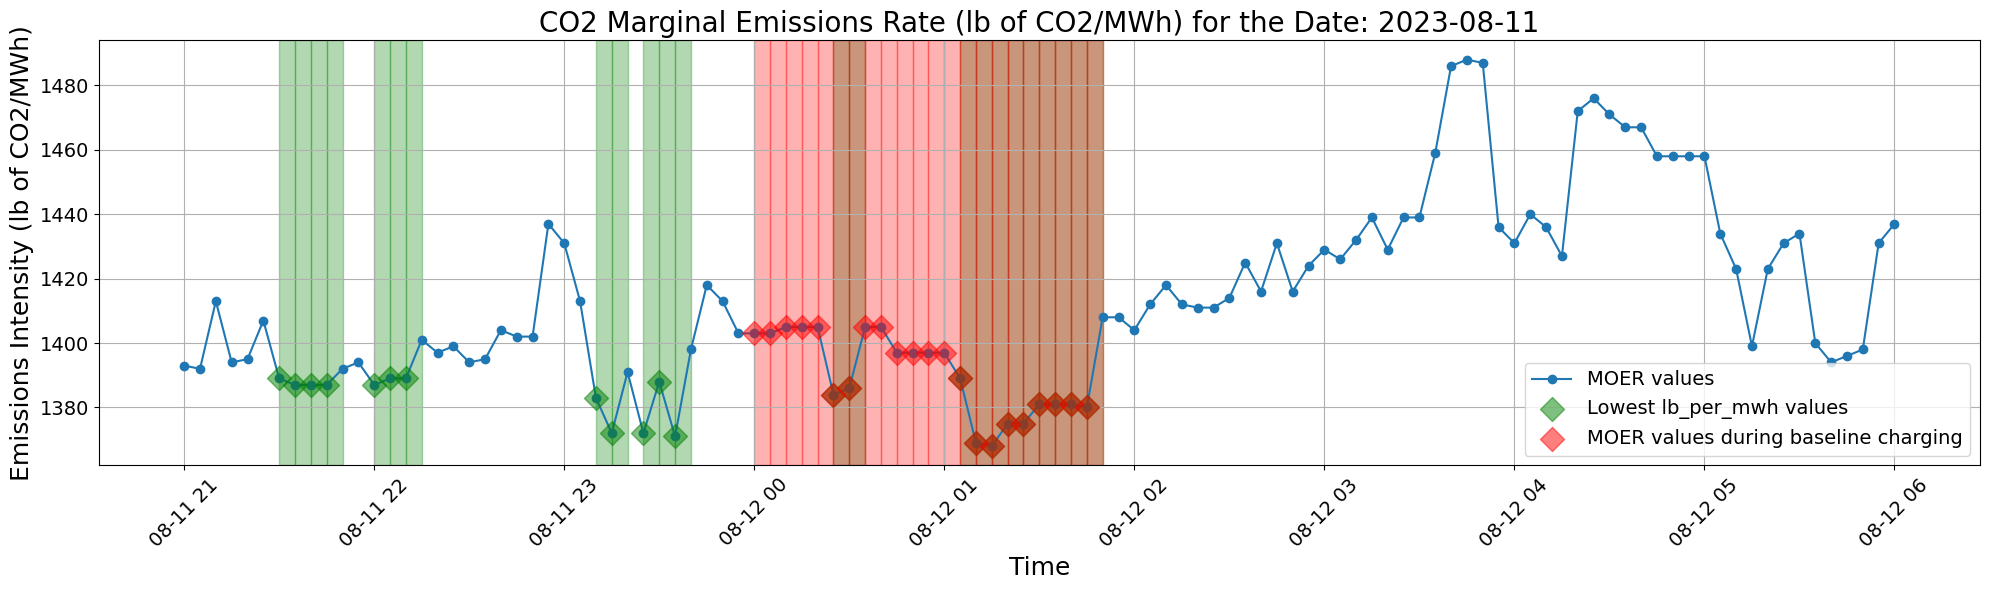

In [ ]:
# Plot five days randomly to observe both the current charging time and the recommended charging time

random_night_dfs_with_current_n_recommended_charging = random.sample(night_dfs_with_current_n_recommended_charging, 5)

# Print the separate DataFrames (from 9pm to 6am)
for night_df in random_night_dfs_with_current_n_recommended_charging:
    plot_time_series(df=night_df, day_long=True, mark_lowest_n=True, mark_baseline_charging=True)



In [ ]:
random_night_dfs_with_current_n_recommended_charging[0]

moer_lb_per_mwh  lowest_n  baseline_charging
point_time                                                             
2023-05-14 21:00:00-05:00             1376      True              False
2023-05-14 21:05:00-05:00             1386      True              False
2023-05-14 21:10:00-05:00             1385      True              False
2023-05-14 21:15:00-05:00             1385      True              False
2023-05-14 21:20:00-05:00             1389      True              False
...                                    ...       ...                ...
2023-05-15 05:40:00-05:00             1411     False              False
2023-05-15 05:45:00-05:00             1412     False              False
2023-05-15 05:50:00-05:00             1412     False              False
2023-05-15 05:55:00-05:00             1410     False              False
2023-05-15 06:00:00-05:00             1410     False              False

[109 rows x 3 columns]

# 6. Extracting the MOER values corresponding to recommended charging time and baseline charging time and calculating daily emissions associated with both

$$
E_{\text{baseline}} = \Sigma_{t=1}^{n} (MOER(t) \cdot Load_{\text{baseline}}(t))
$$

$$
E_{\text{recommended}} = \Sigma_{t=1}^{n} (MOER(t) \cdot Load_{\text{recommended}}(t))
$$

$$
E_{\text{avoided}} = (E_{\text{baseline}} - E_{\text{recommended}})* (No.\: of\:
 charging\: days/365)
$$

$$
MOER(t) = Marginal\: Operating\: Emissions\: Rate\ in\: lb\: of\: CO_2\: per\: MWh\: at\: time\: t\:
$$

$$
Load(t) = Load\: associated\: with\: charging\: behaviour\: in\: MWh\: at\: time\: t\:
$$

$$
E_{\text{baseline}} = Total\: annual\: emissions\: in\: lb\: of\: CO_2\: associated\: with\: baseline\: charging\: approach
$$

$$
E_{\text{recommended}} = Total\: annual\: emissions\: in\: lb\: of\: CO_2\: after\: integrating\: with\:AER\:
$$

$$
E_{\text{avoided}} = Annual\: emissions\: avoided\ in\: lb\: of\: CO_2\:
$$

In [ ]:
# Adding another column to signify current charging time

def get_lowest_moer_and_baseline_moer(dfs, n, power_rating, hours_charged_per_day):
    # Create a blank DataFrame with the specified columns
    final_df = pd.DataFrame(columns=['mean_daily_emissions_recommendation', 'mean_daily_emissions_baseline', 'difference'])
    final_df.index = pd.to_datetime([])
    final_df.index.name = 'date'

    for df in dfs:

      # Determining the date of the df
      day_date = df.index[0].date()

      # Extract values where 'lowest_n' is True
      lowest_n_values = df[df['lowest_n']]['moer_lb_per_mwh']
      sorted_series = lowest_n_values.sort_values()
      mean_lowest_n = sorted_series.head(n).mean()
      mean_emissions_recommendation = mean_lowest_n * power_rating * hours_charged_per_day/1000

      # Extract values where 'baseline_charging' is True
      baseline_charging_values = df[df['baseline_charging']]['moer_lb_per_mwh']
      mean_baseline_charging_values = baseline_charging_values.mean()
      mean_emissions_baseline = mean_baseline_charging_values * power_rating * hours_charged_per_day/1000

      final_df.loc[day_date] = [mean_emissions_recommendation, mean_emissions_baseline, mean_emissions_baseline-mean_emissions_recommendation]

    return final_df


result_df = get_lowest_moer_and_baseline_moer(dfs=night_dfs_with_current_n_recommended_charging, n=22, power_rating=7, hours_charged_per_day=1.83)
result_df


mean_daily_emissions_recommendation  \
date                                              
2023-01-01                            17.648686   
2023-01-02                             1.323506   
2023-01-03                            14.120114   
2023-01-04                            17.995721   
2023-01-05                            17.349398   
...                                         ...   
2023-12-26                            16.585456   
2023-12-27                            17.938076   
2023-12-28                             0.148480   
2023-12-29                            17.992810   
2023-12-30                             0.538602   

            mean_daily_emissions_baseline  difference  
date                                                   
2023-01-01                      18.786447    1.137761  
2023-01-02                       4.036897    2.713391  
2023-01-03                      19.127077    5.006963  
2023-01-04                      18.982091    0.986370  
2023-01-05                      17.970683    0.621285  
...                                   ...         ...  
2023-12-26                      19.110773    2.525317  
2023-12-27                      18.511615    0.573539  
2023-12-28                       4.561525    4.413045  
2023-12-29                      18.374198    0.381389  
2023-12-30                      11.913300   11.374698  

[364 rows x 3 columns]

In [ ]:
def calculate_emissions_saved(result_df, num_days):

  total_annual_emissions_baseline = result_df['mean_daily_emissions_baseline'].mean()*num_days
  total_annual_emissions_recommendation = result_df['mean_daily_emissions_recommendation'].mean()*num_days

  emissions_saved = total_annual_emissions_baseline - total_annual_emissions_recommendation
  percent_emissions_saved = emissions_saved * 100/total_annual_emissions_baseline

  print(f'Total annual emissions from baseline charging pattern (lb of CO2): {total_annual_emissions_baseline}')
  print(f'Total annual emissions from recommended charging pattern (lb of CO2): {total_annual_emissions_recommendation}')
  print(f'Total emissions saved annually (lb of CO2): {emissions_saved}')
  print(f'% savings annually: {percent_emissions_saved}')

  return None

calculate_emissions_saved(result_df, 310)

Total annual emissions from baseline charging pattern (lb of CO2): 4329.537803982498
Total annual emissions from recommended charging pattern (lb of CO2): 3343.3280019230774
Total emissions saved annually (lb of CO2): 986.2098020594208
% savings annually: 22.778639353888117


In [ ]:

df_emissions_savings = pd.DataFrame(columns=['power_rating', 'time_of_charging', 'charging_hours', 'total_baseline', 'total_recommended','total_emissions_saved', 'percent_emissions_saved'])
print("Initial DataFrame:")
print(df_emissions_savings)

# Step 2: Define a function to add new values
def add_entry(df, power_rating, time_of_charging, charging_hours, total_baseline, total_recommended, total_emissions_saved, percent_emissions_saved):

    new_entry = pd.DataFrame({
        'power_rating': [power_rating],
        'time_of_charging': [time_of_charging],
        'charging_hours': [charging_hours],
        'total_baseline': [total_baseline],
        'total_recommended': [total_recommended],
        'total_emissions_saved': [total_emissions_saved],
        'percent_emissions_saved': [percent_emissions_saved]
    })
    df = pd.concat([df, new_entry], ignore_index=True)
    return df

# Adding new entries
df_emissions_savings = add_entry(df_emissions_savings, 1.8, 21, 7.08,  4467.88, 4202.85, 265.025 , 5.9317)
df_emissions_savings = add_entry(df_emissions_savings, 1.8, 22.8, 7.08, 4390.069, 4202.859, 187.209 , 4.264)

df_emissions_savings = add_entry(df_emissions_savings, 7, 21, 1.82, 4886.71, 3343.328, 1543.39 ,31.58 )
df_emissions_savings = add_entry(df_emissions_savings, 7, 0, 1.82, 4329.537 , 3343.328, 986.209, 22.78)
df_emissions_savings = add_entry(df_emissions_savings, 7, 2, 1.82, 4340.79 , 3343.328, 997.46 , 22.978)
df_emissions_savings = add_entry(df_emissions_savings, 7, 4, 1.82, 4538.149, 3343.328, 1194.82 , 26.32)

df_emissions_savings = add_entry(df_emissions_savings, 19, 21, 0.67, 4989.38, 2889.84, 2099.538 , 42.08 )
df_emissions_savings = add_entry(df_emissions_savings, 19, 0, 0.67, 4310.94 , 2889.84, 1421.10, 32.96)
df_emissions_savings = add_entry(df_emissions_savings, 19, 2, 0.67, 4306.72 , 2889.84, 1416.88 , 32.89)
df_emissions_savings = add_entry(df_emissions_savings, 19, 4, 0.67, 4393.005, 2889.84, 1503.16 , 34.21)


print("\nDataFrame after adding new entries:")
df_emissions_savings


Initial DataFrame:
Empty DataFrame
Columns: [power_rating, time_of_charging, charging_hours, total_baseline, total_recommended, total_emissions_saved, percent_emissions_saved]
Index: []

DataFrame after adding new entries:


power_rating time_of_charging  charging_hours  total_baseline  \
0           1.8               21            7.08        4467.880   
1           1.8             22.8            7.08        4390.069   
2           7.0               21            1.82        4886.710   
3           7.0                0            1.82        4329.537   
4           7.0                2            1.82        4340.790   
5           7.0                4            1.82        4538.149   
6          19.0               21            0.67        4989.380   
7          19.0                0            0.67        4310.940   
8          19.0                2            0.67        4306.720   
9          19.0                4            0.67        4393.005   

   total_recommended  total_emissions_saved  percent_emissions_saved  
0           4202.850                265.025                   5.9317  
1           4202.859                187.209                   4.2640  
2           3343.328               1543.390                  31.5800  
3           3343.328                986.209                  22.7800  
4           3343.328                997.460                  22.9780  
5           3343.328               1194.820                  26.3200  
6           2889.840               2099.538                  42.0800  
7           2889.840               1421.100                  32.9600  
8           2889.840               1416.880                  32.8900  
9           2889.840               1503.160                  34.2100

In [ ]:
# Generating a pivoted dataframe for sensitivity analysis

def convert_to_time(decimal_hours):
    hours = int(decimal_hours)
    minutes = int((decimal_hours - hours) * 60)
    return f"{hours:02}:{minutes:02}"

# Apply the conversion
df_emissions_savings['time_of_charging'] = df_emissions_savings['time_of_charging'].apply(convert_to_time)
df_emissions_savings['time_of_charging'] = pd.to_datetime(df_emissions_savings['time_of_charging'], format='%H:%M').dt.time

# Find the index position of 21:00:00
start_index = df_emissions_savings[df_emissions_savings['time_of_charging'] == pd.to_datetime('21:00:00').time()].index[0]

# Rearrange the index
df_emissions_savings = pd.concat([df_emissions_savings.loc[start_index:], df_emissions_savings.loc[:start_index-1]])

# Pivot the DataFrame
pivot_df = df_emissions_savings.pivot(index='time_of_charging', columns='power_rating', values='percent_emissions_saved')

# Display the pivoted DataFrame
pivot_df

power_rating        1.8     7.0    19.0
time_of_charging                       
00:00:00             NaN  22.780  32.96
02:00:00             NaN  22.978  32.89
04:00:00             NaN  26.320  34.21
21:00:00          5.9317  31.580  42.08
22:48:00          4.2640     NaN    NaN

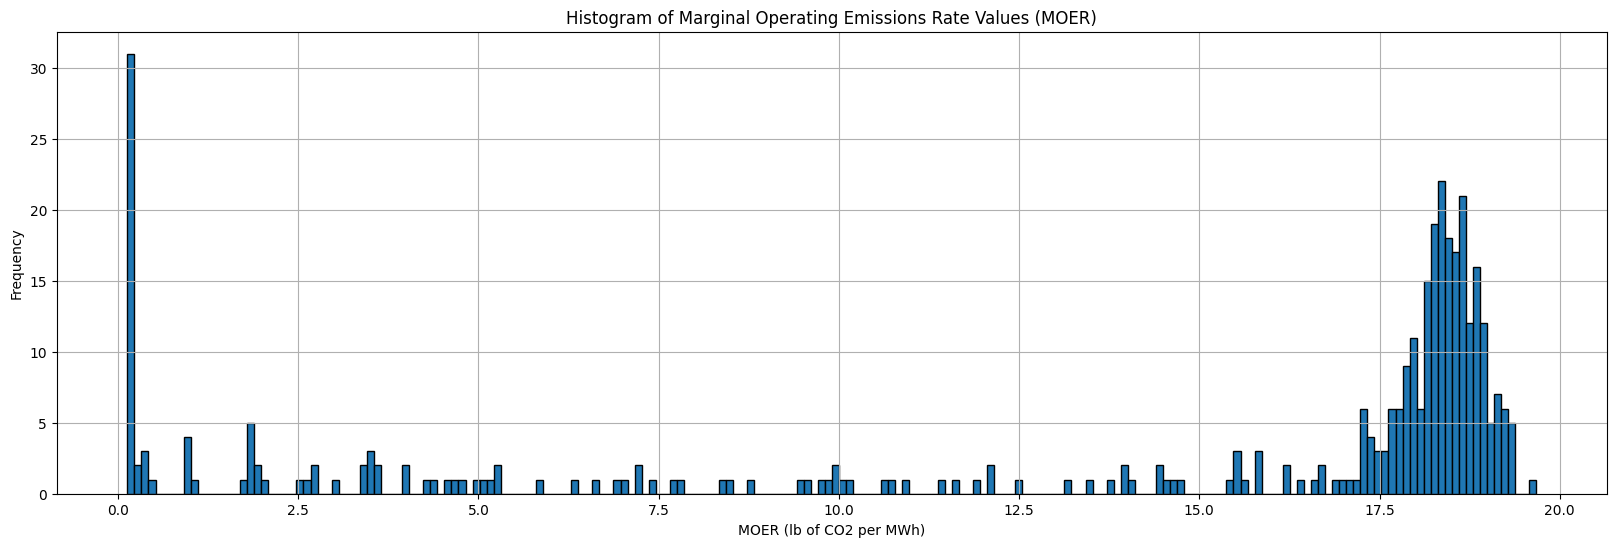

In [ ]:
plot_histogram(result_df, 'mean_daily_emissions_baseline', bins=200, x_min=None, x_max=None, figsize=(20, 6))

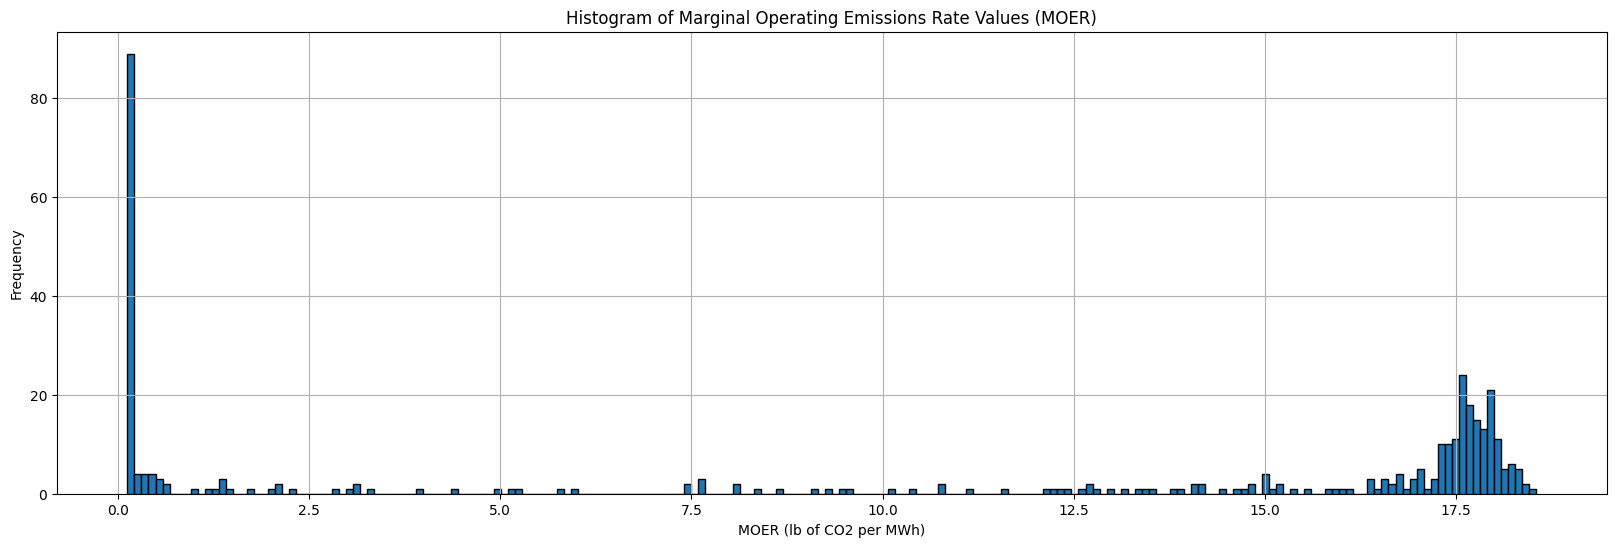

In [ ]:
plot_histogram(result_df, 'mean_daily_emissions_recommendation', bins=200, x_min=None, x_max=None, figsize=(20, 6))

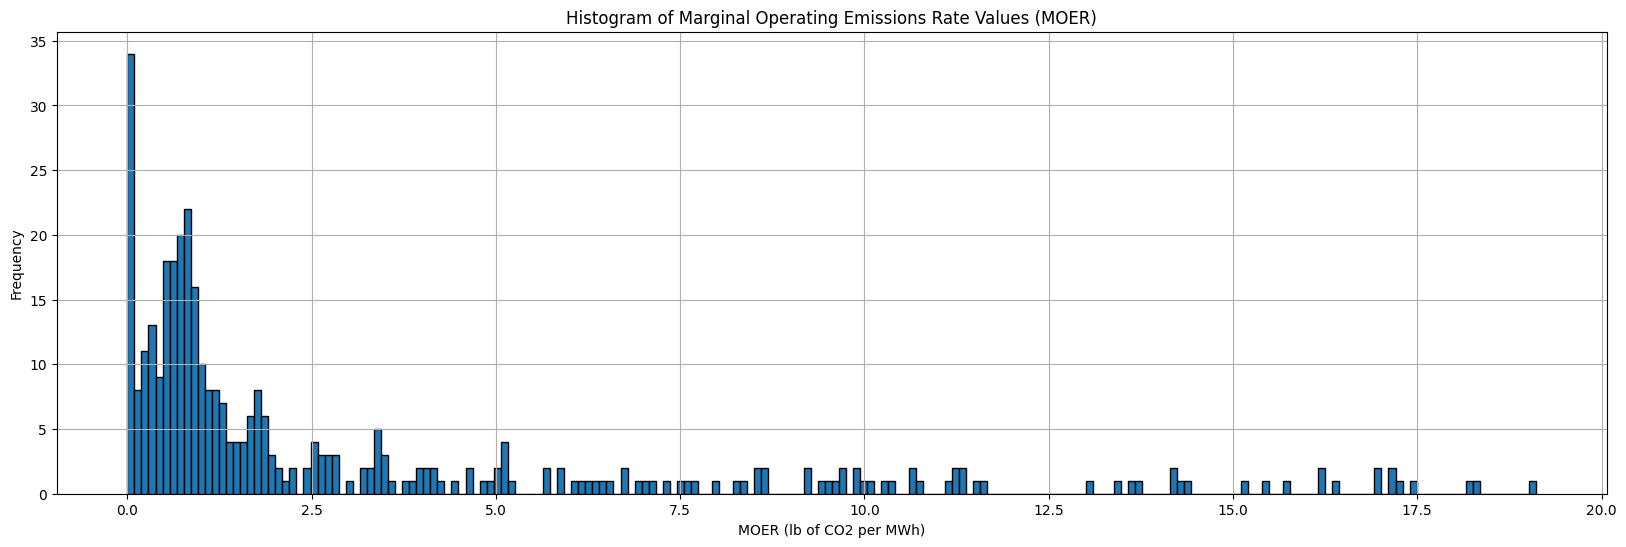

In [ ]:
plot_histogram(result_df, 'difference', bins=200, x_min=None, x_max=None, figsize=(20, 6))

In [ ]:
diff_mean = result_df['difference'].mean()
print(diff_mean)

3.1813219421271666
